Exploratory Data Analysis - Netflix DataBase

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400 
import seaborn as sns

In [29]:
%matplotlib inline 

In [30]:
df = pd.read_csv("Netflix Userbase.csv")
df.shape

(2500, 10)

In [31]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [32]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [33]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


Pie chart to explain the relationship between type of subscription plan and gender preference 

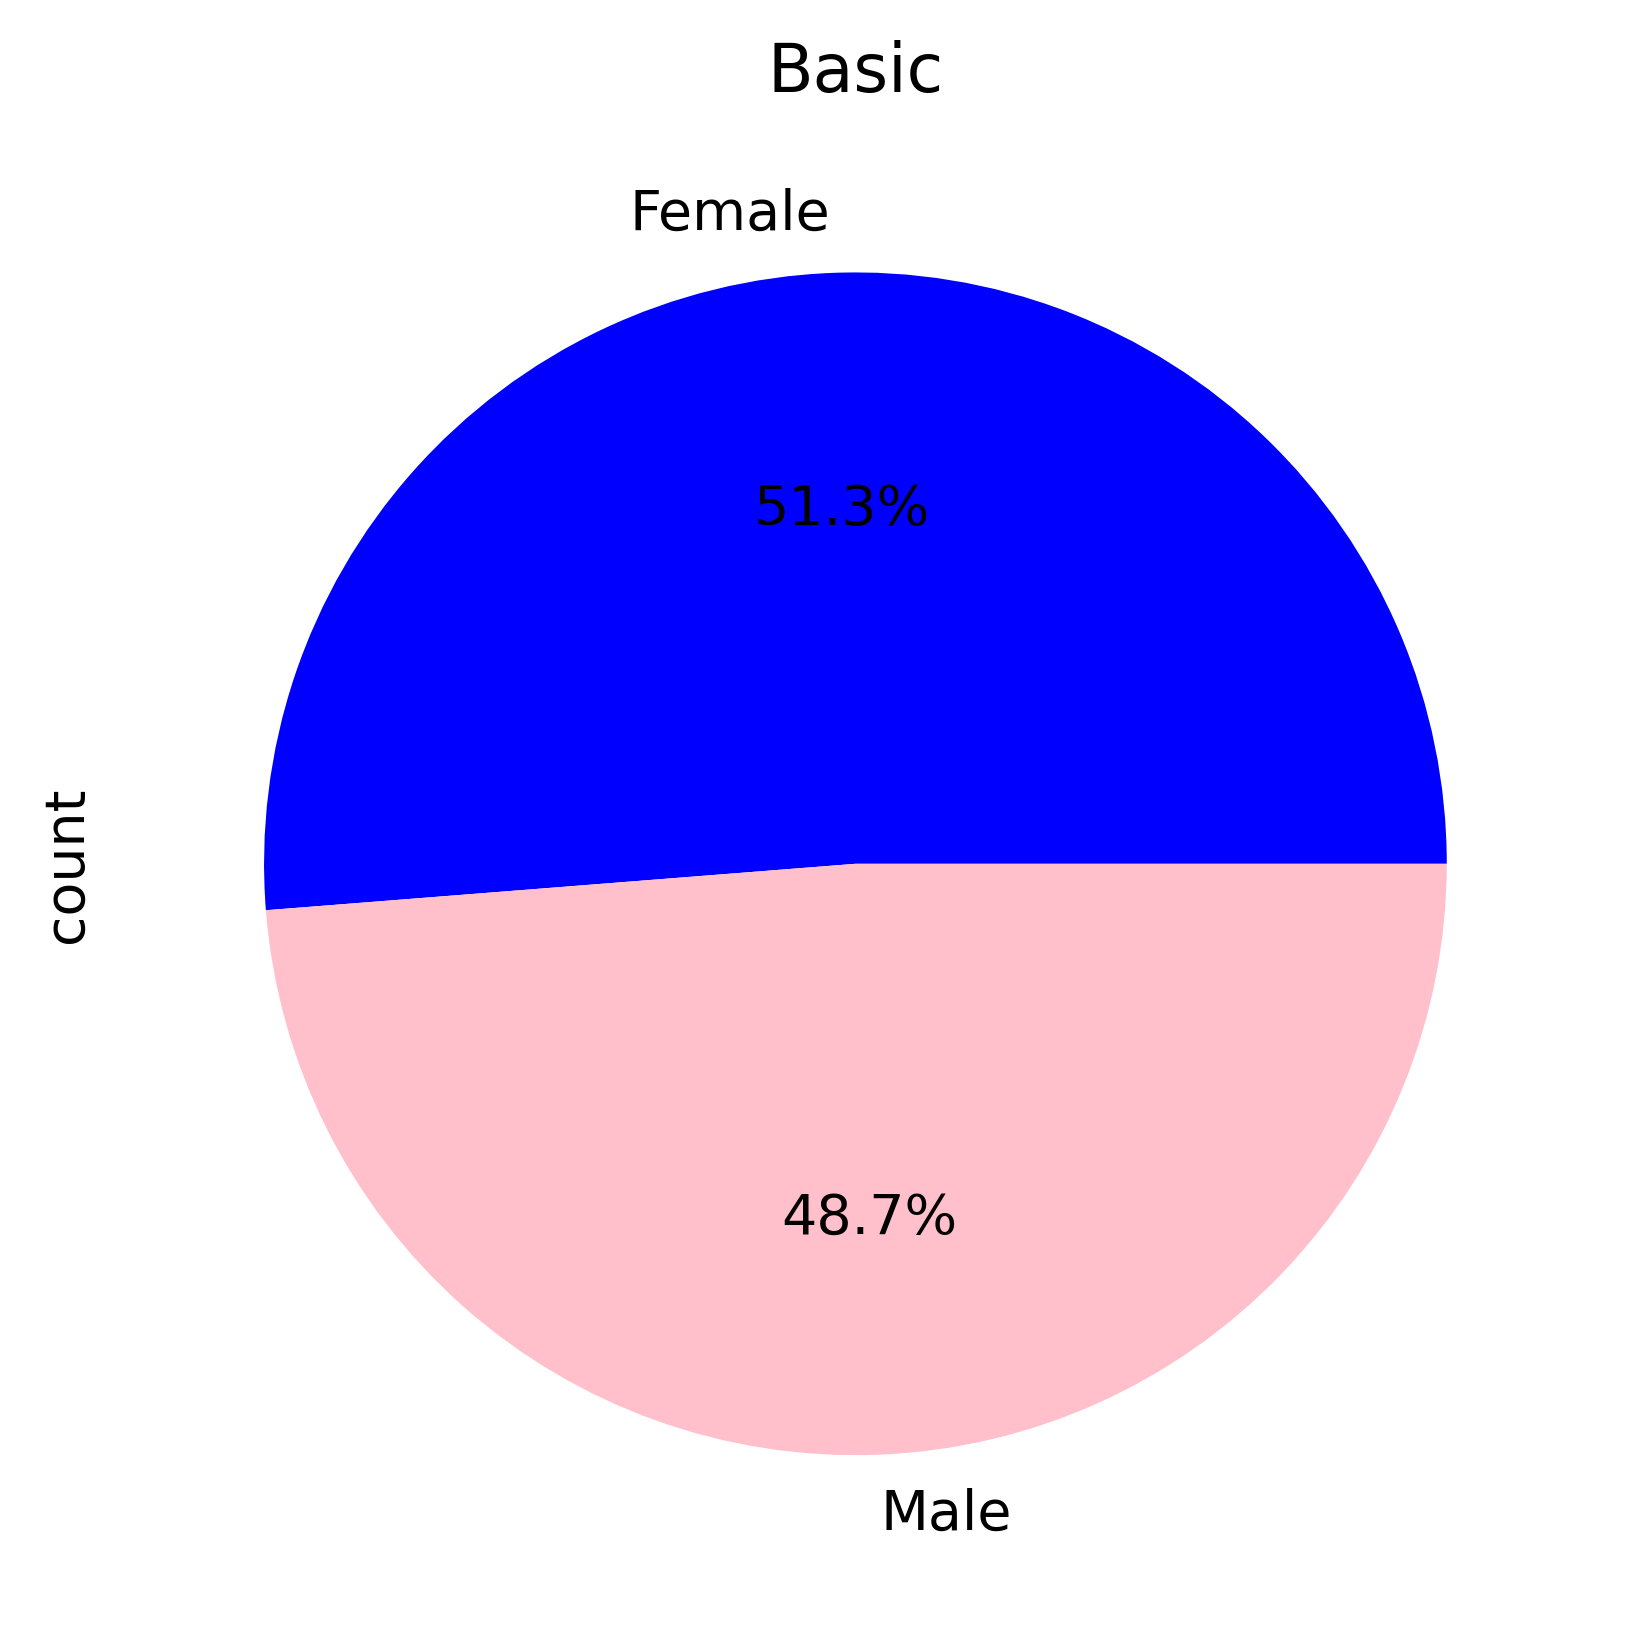

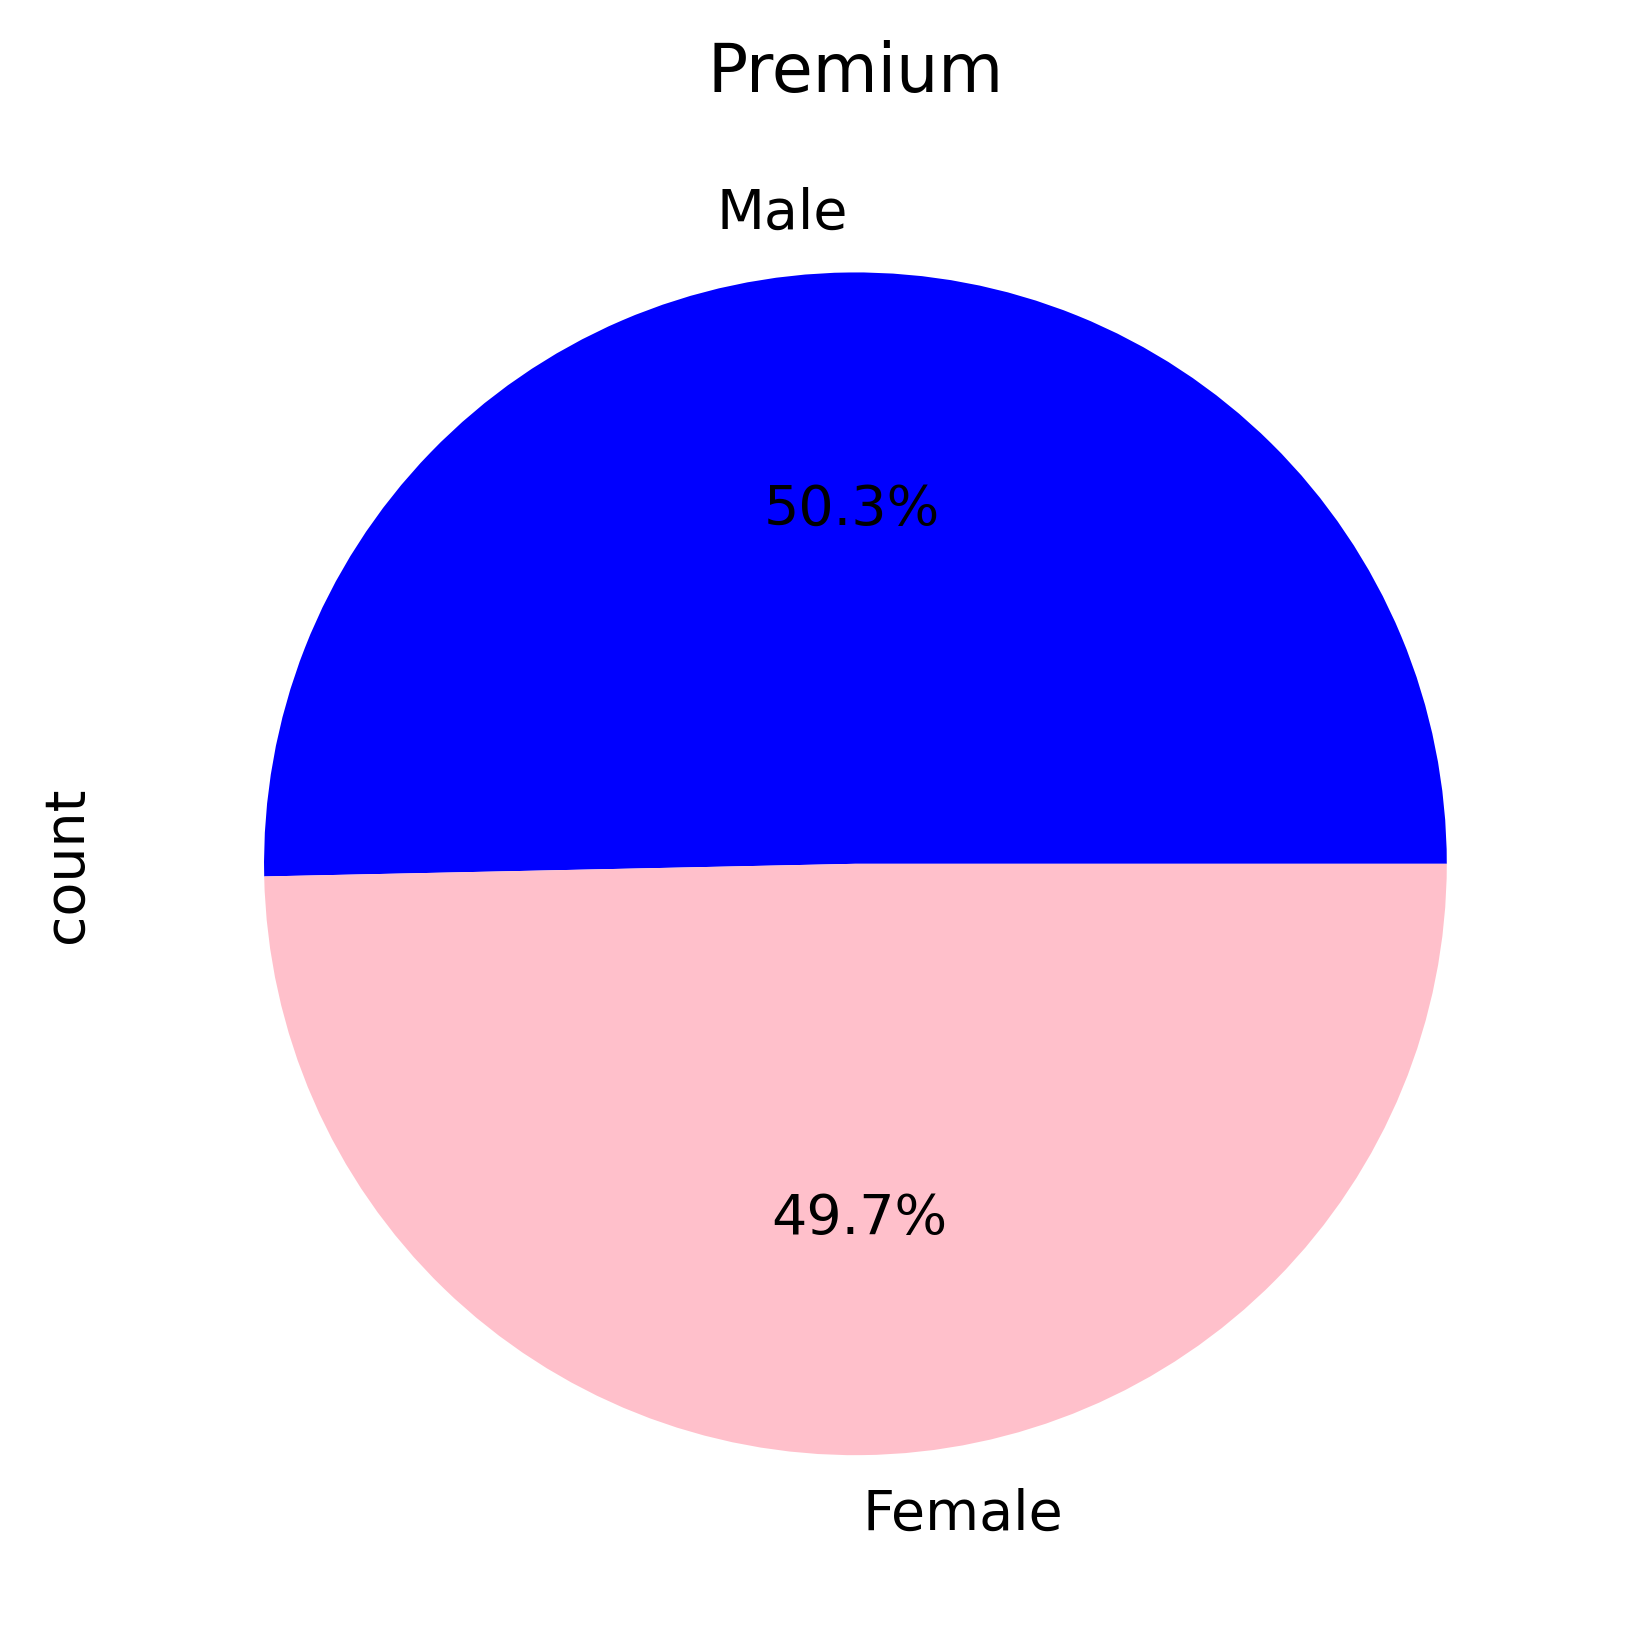

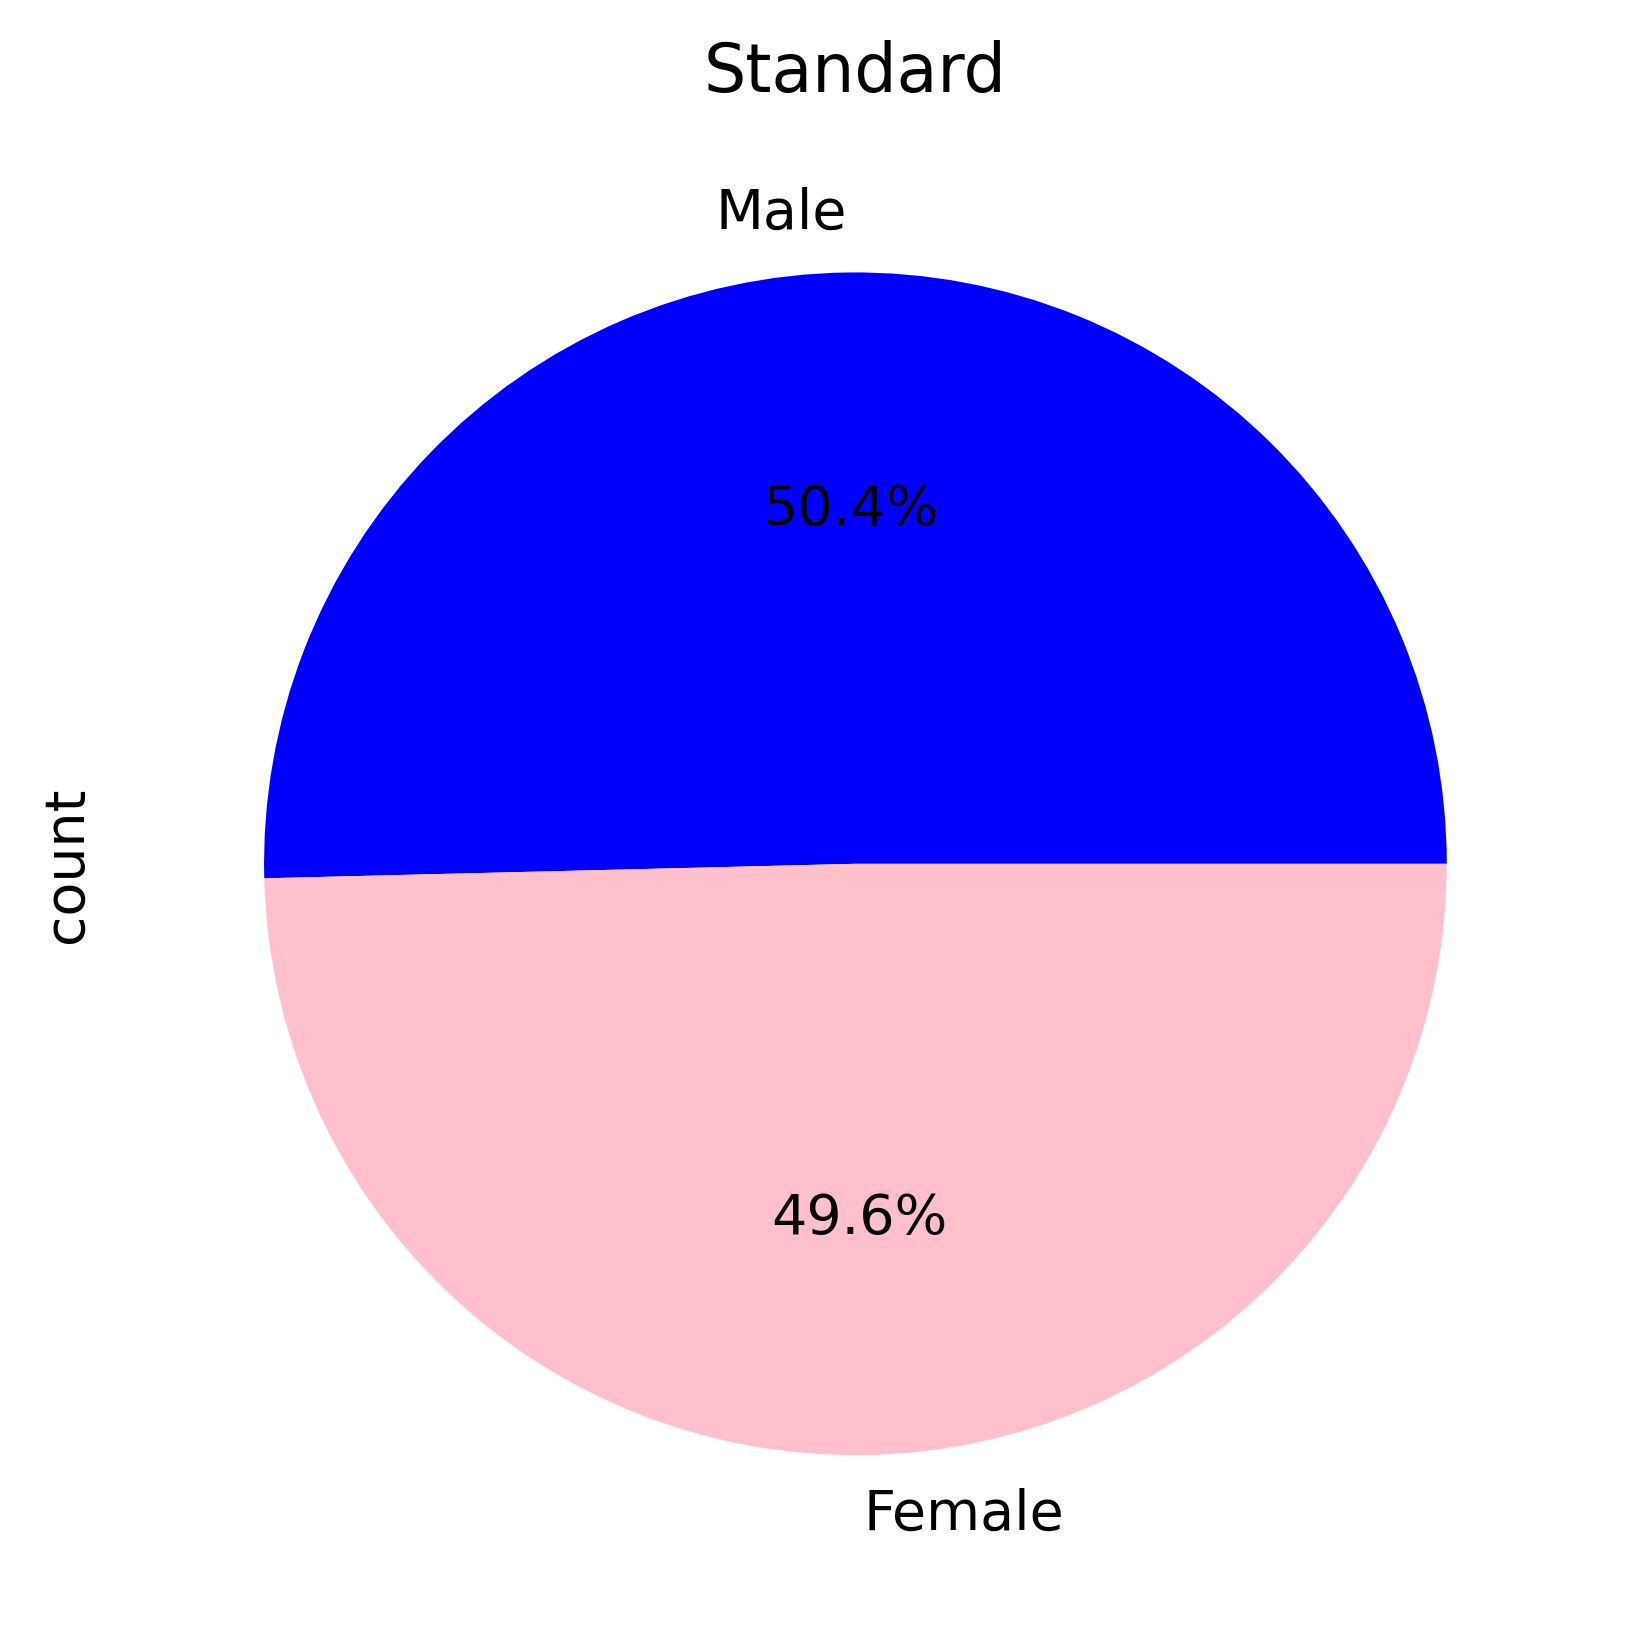

In [34]:
for subscription_type in df["Subscription Type"].unique():
    subset = df[df["Subscription Type"] == subscription_type]
    subset["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", title=subscription_type, colors=["blue", "pink"])
    plt.show()

Bar chart to respresent which country spends the more 

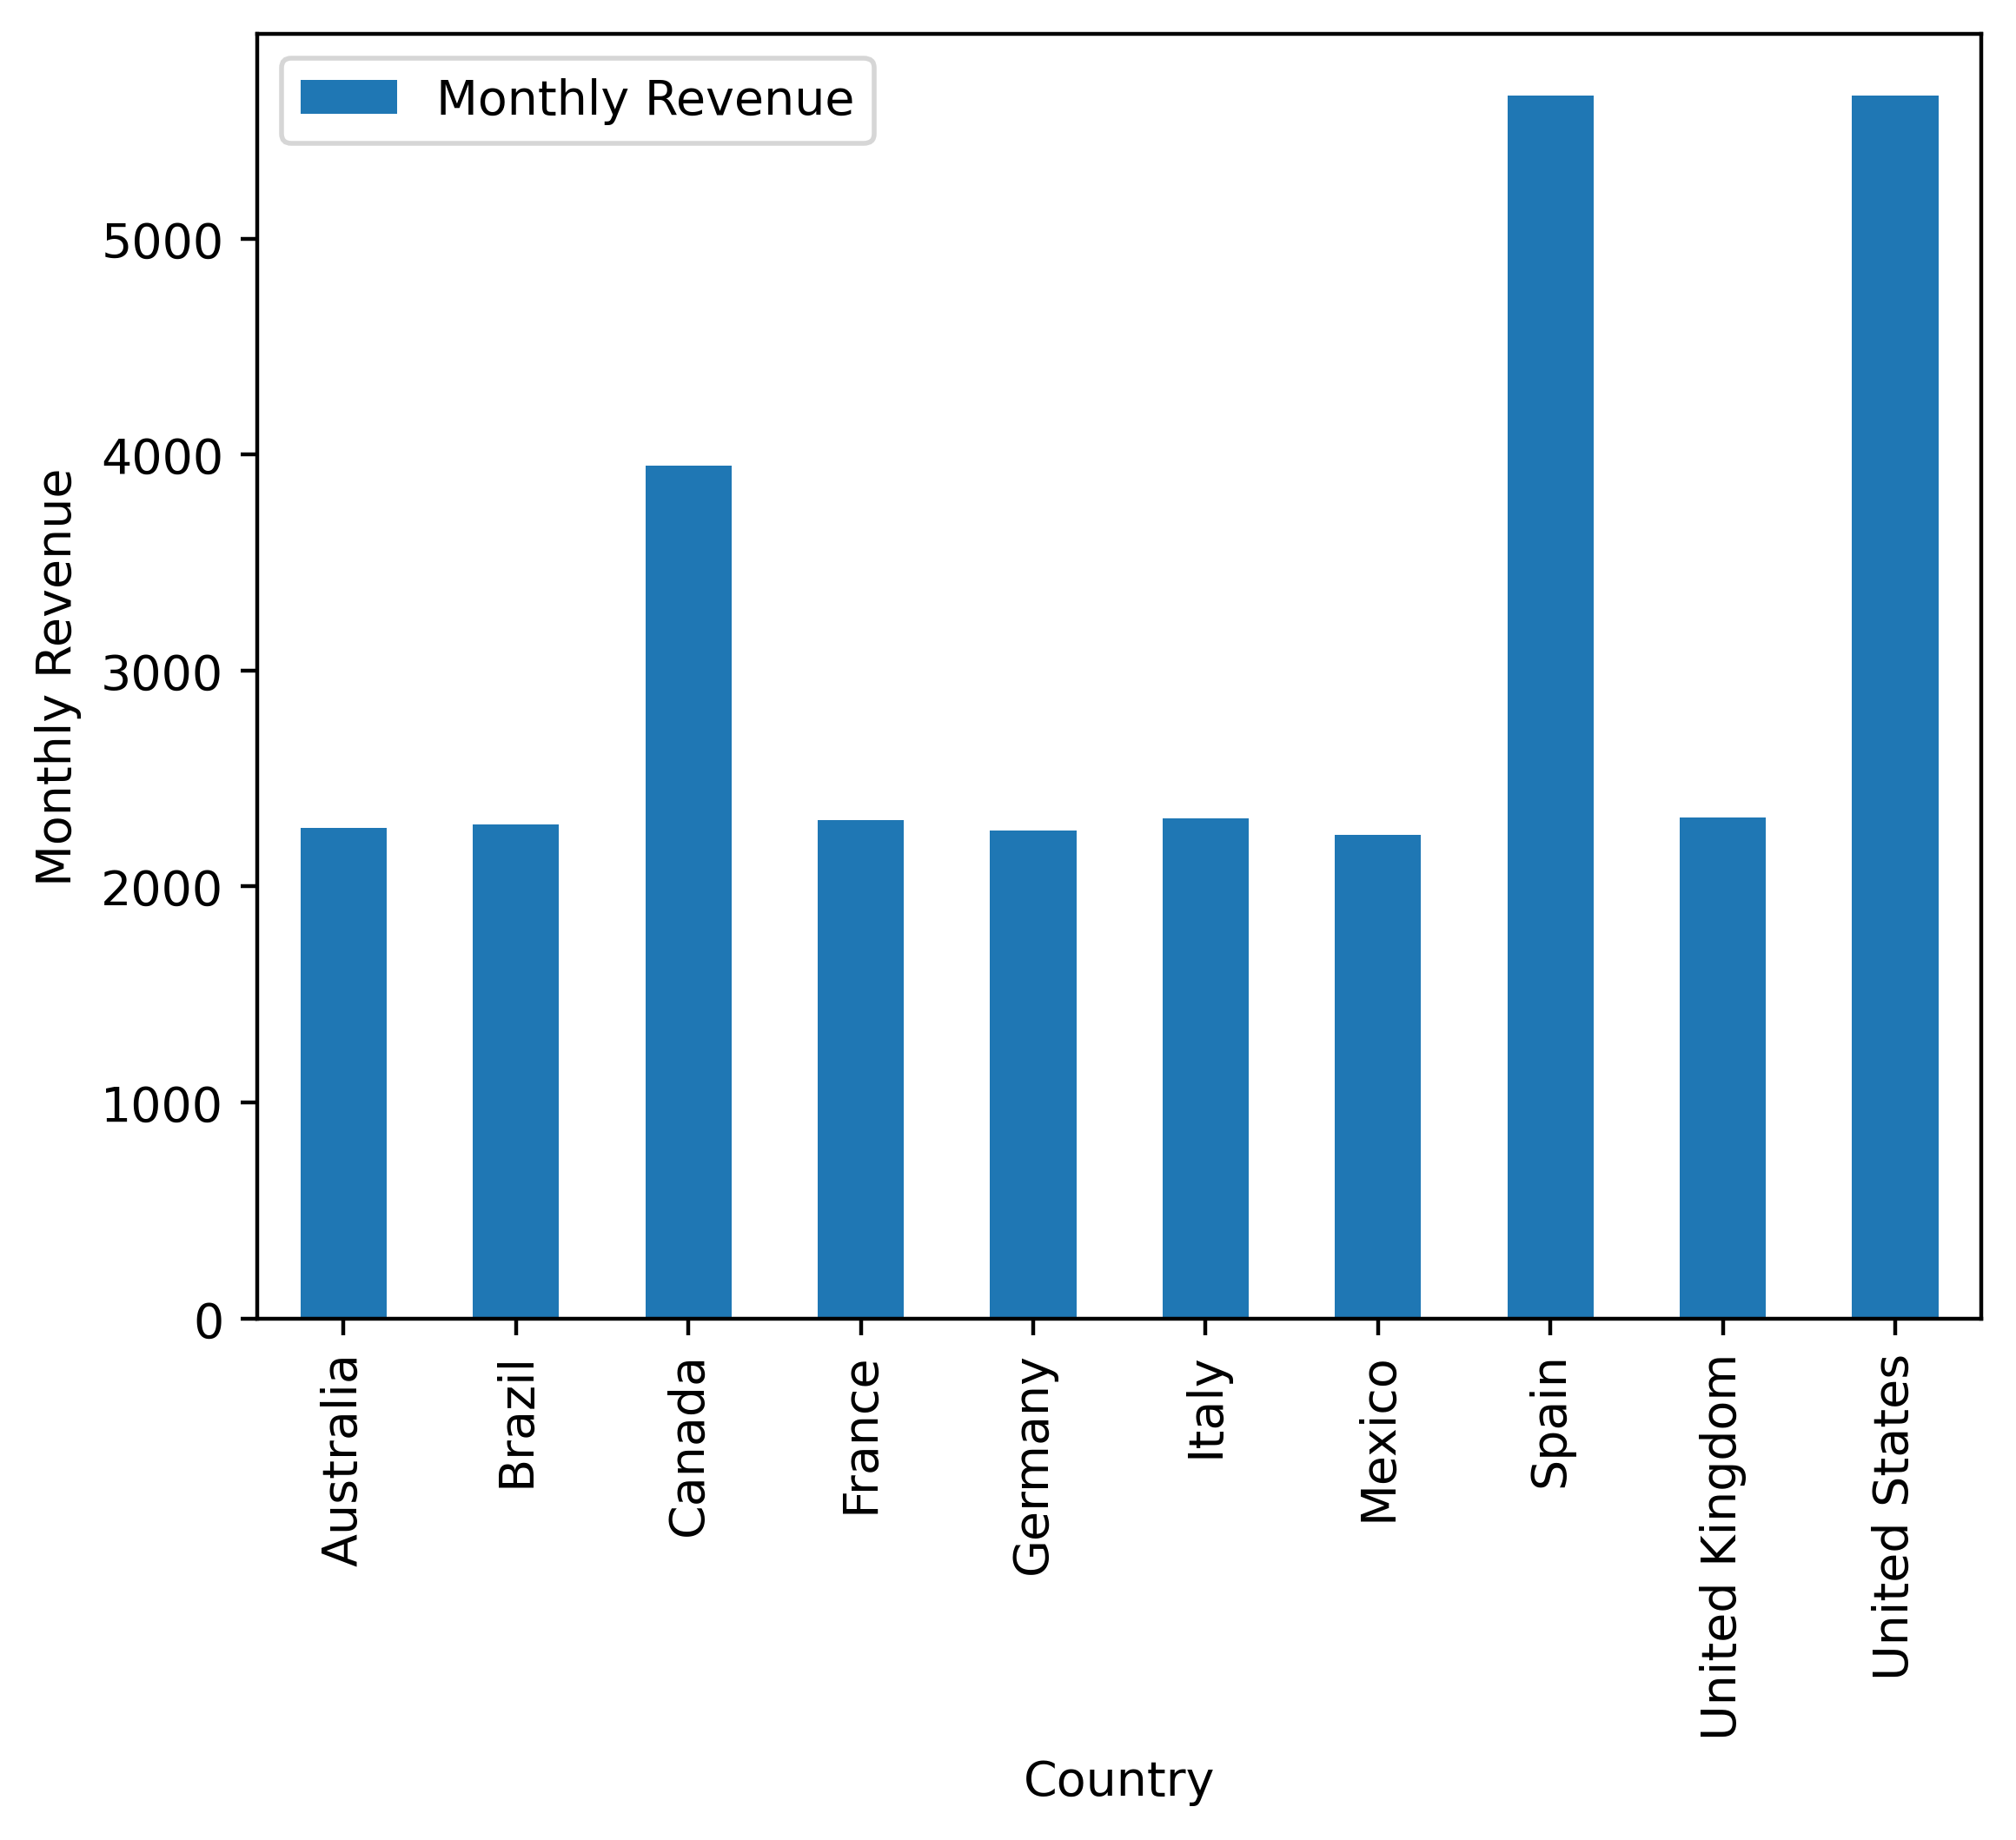

In [85]:
df.groupby('Country').agg({"Monthly Revenue" : "sum"}).plot.bar()
plt.xlabel("Country")
plt.ylabel("Monthly Revenue")
plt.show()

Drawing the relationship between the plan duration and subscription type 

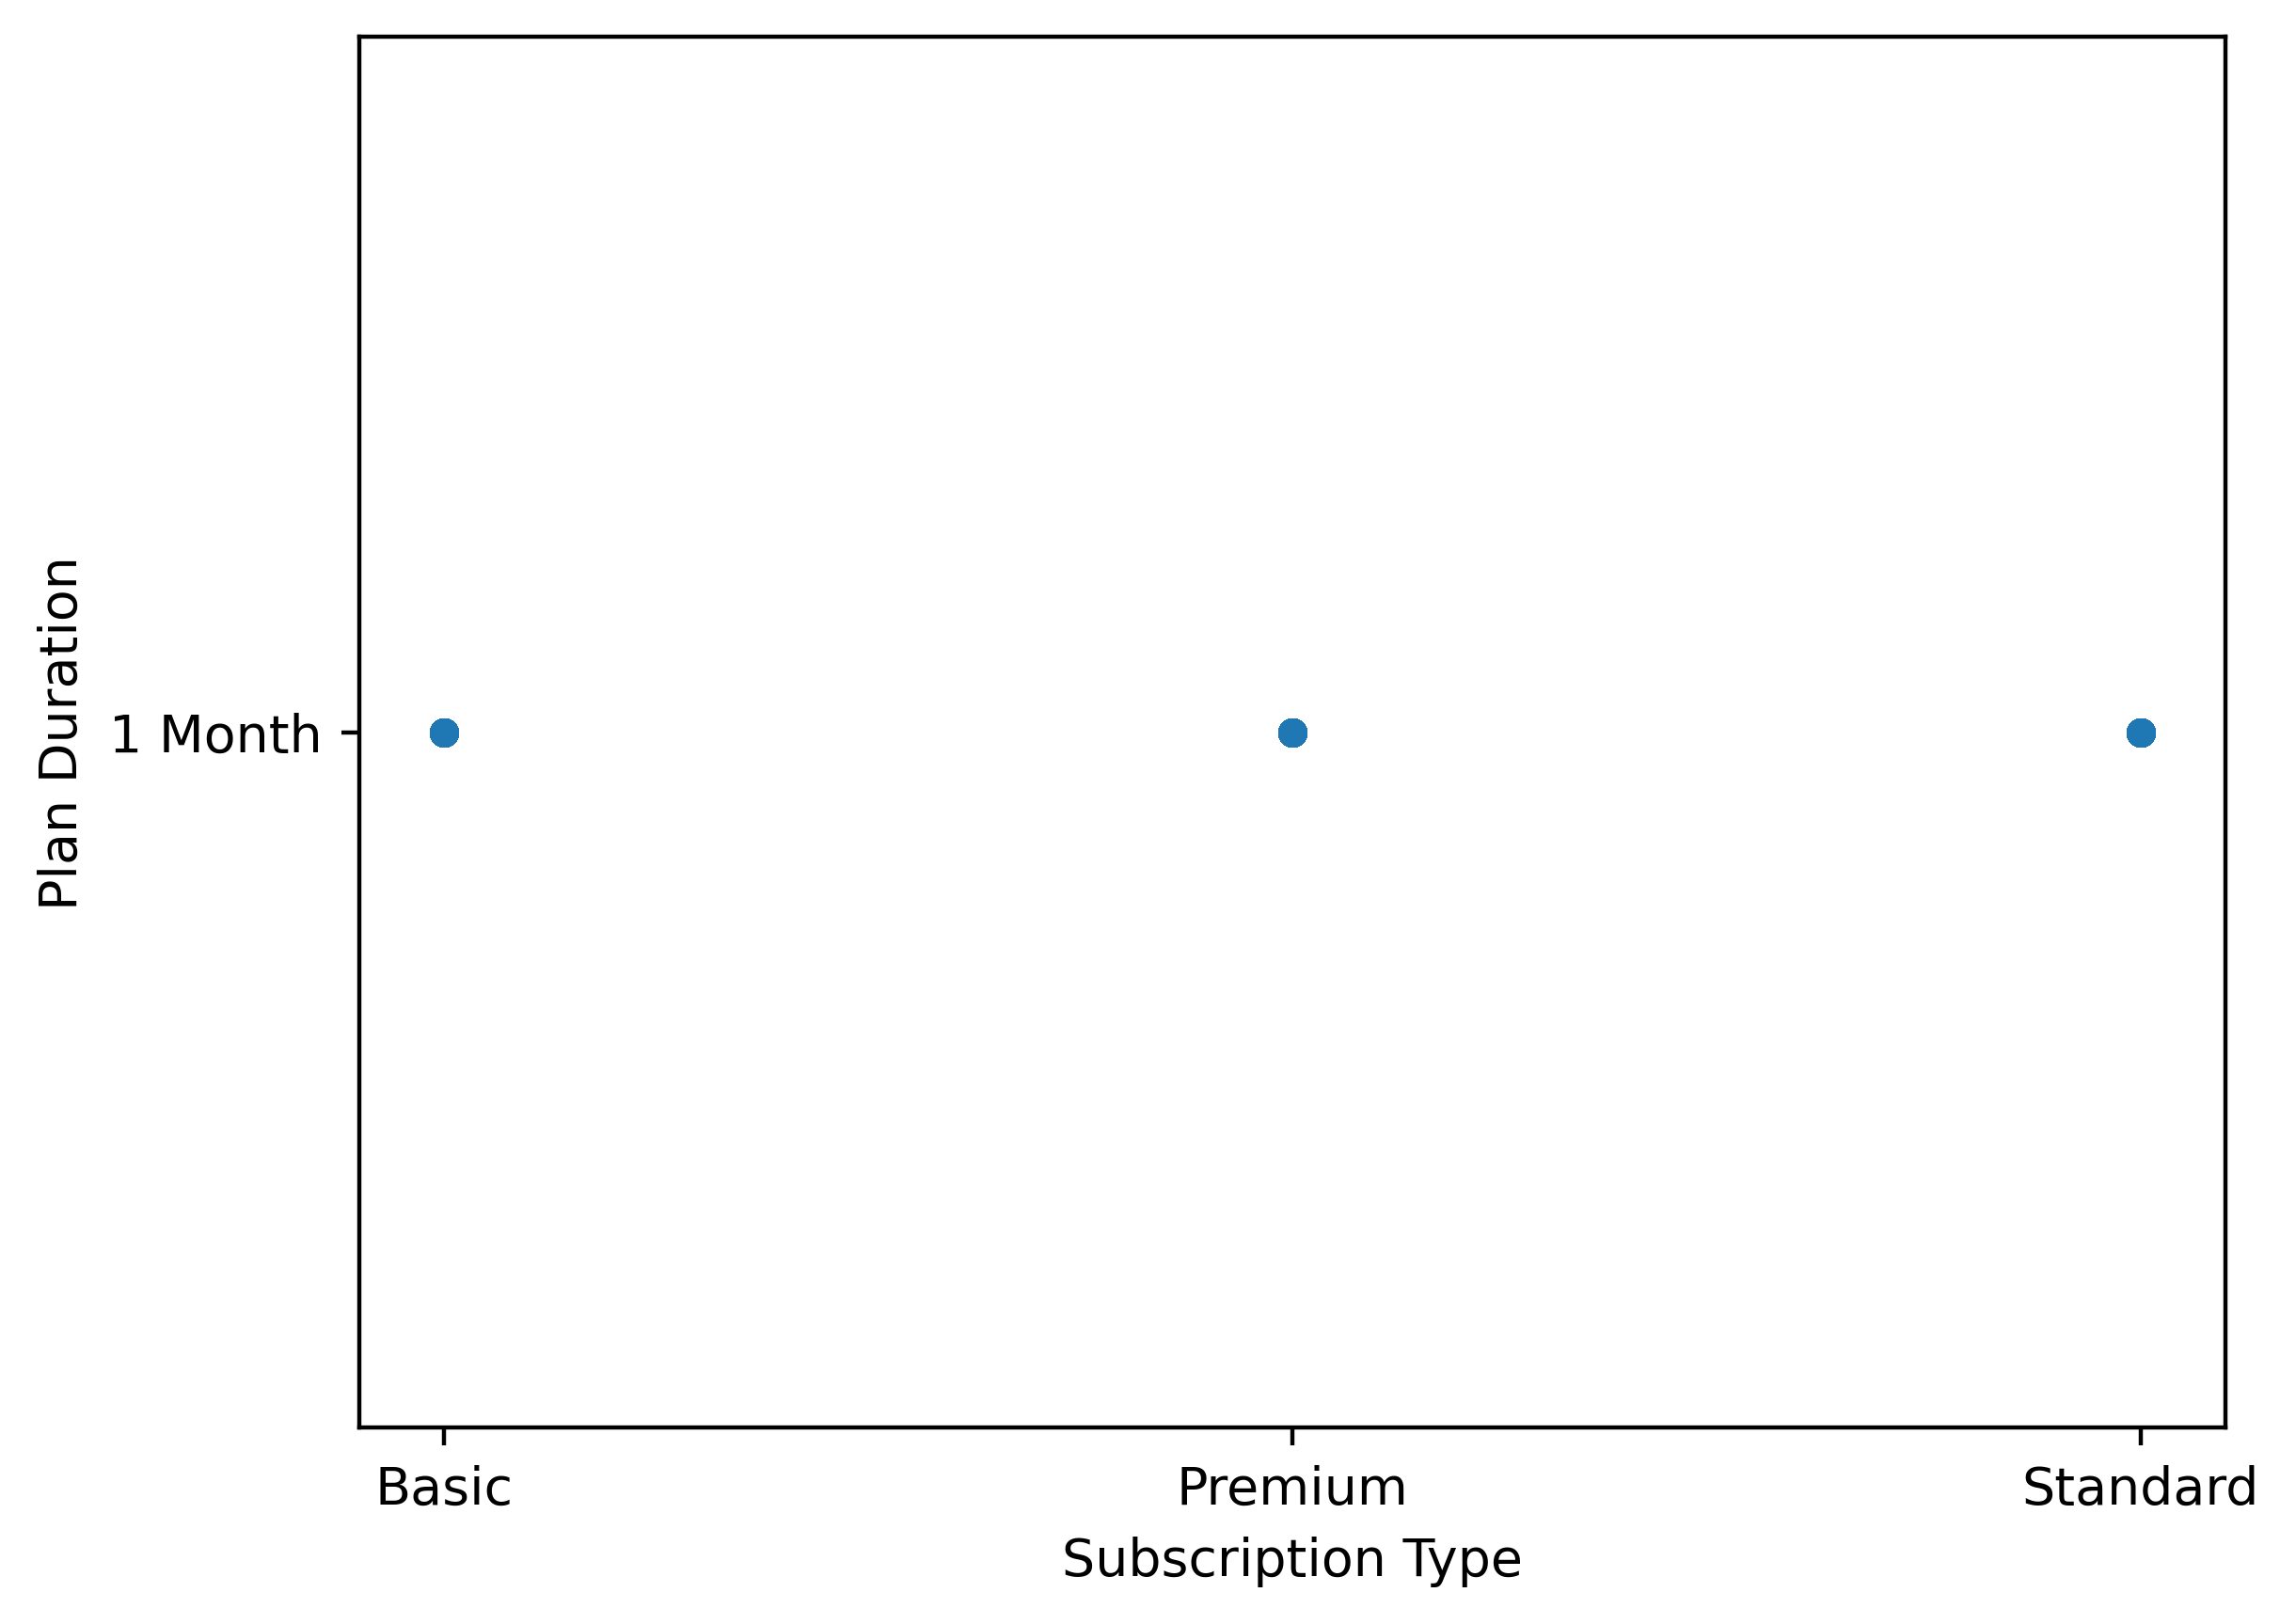

In [36]:
# we are going to plot the realtionship between the plan duration and the subcription type 
df.plot( kind  =  "scatter" , x = "Subscription Type" , y = "Plan Duration")
plt.xlabel("Subscription Type")
plt.ylabel("Plan Duration")
plt.show()

In [37]:
df["Subscription Type"].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [38]:
df["Plan Duration"].value_counts()

Plan Duration
1 Month    2500
Name: count, dtype: int64

Ploting the Highest paying Subscription type

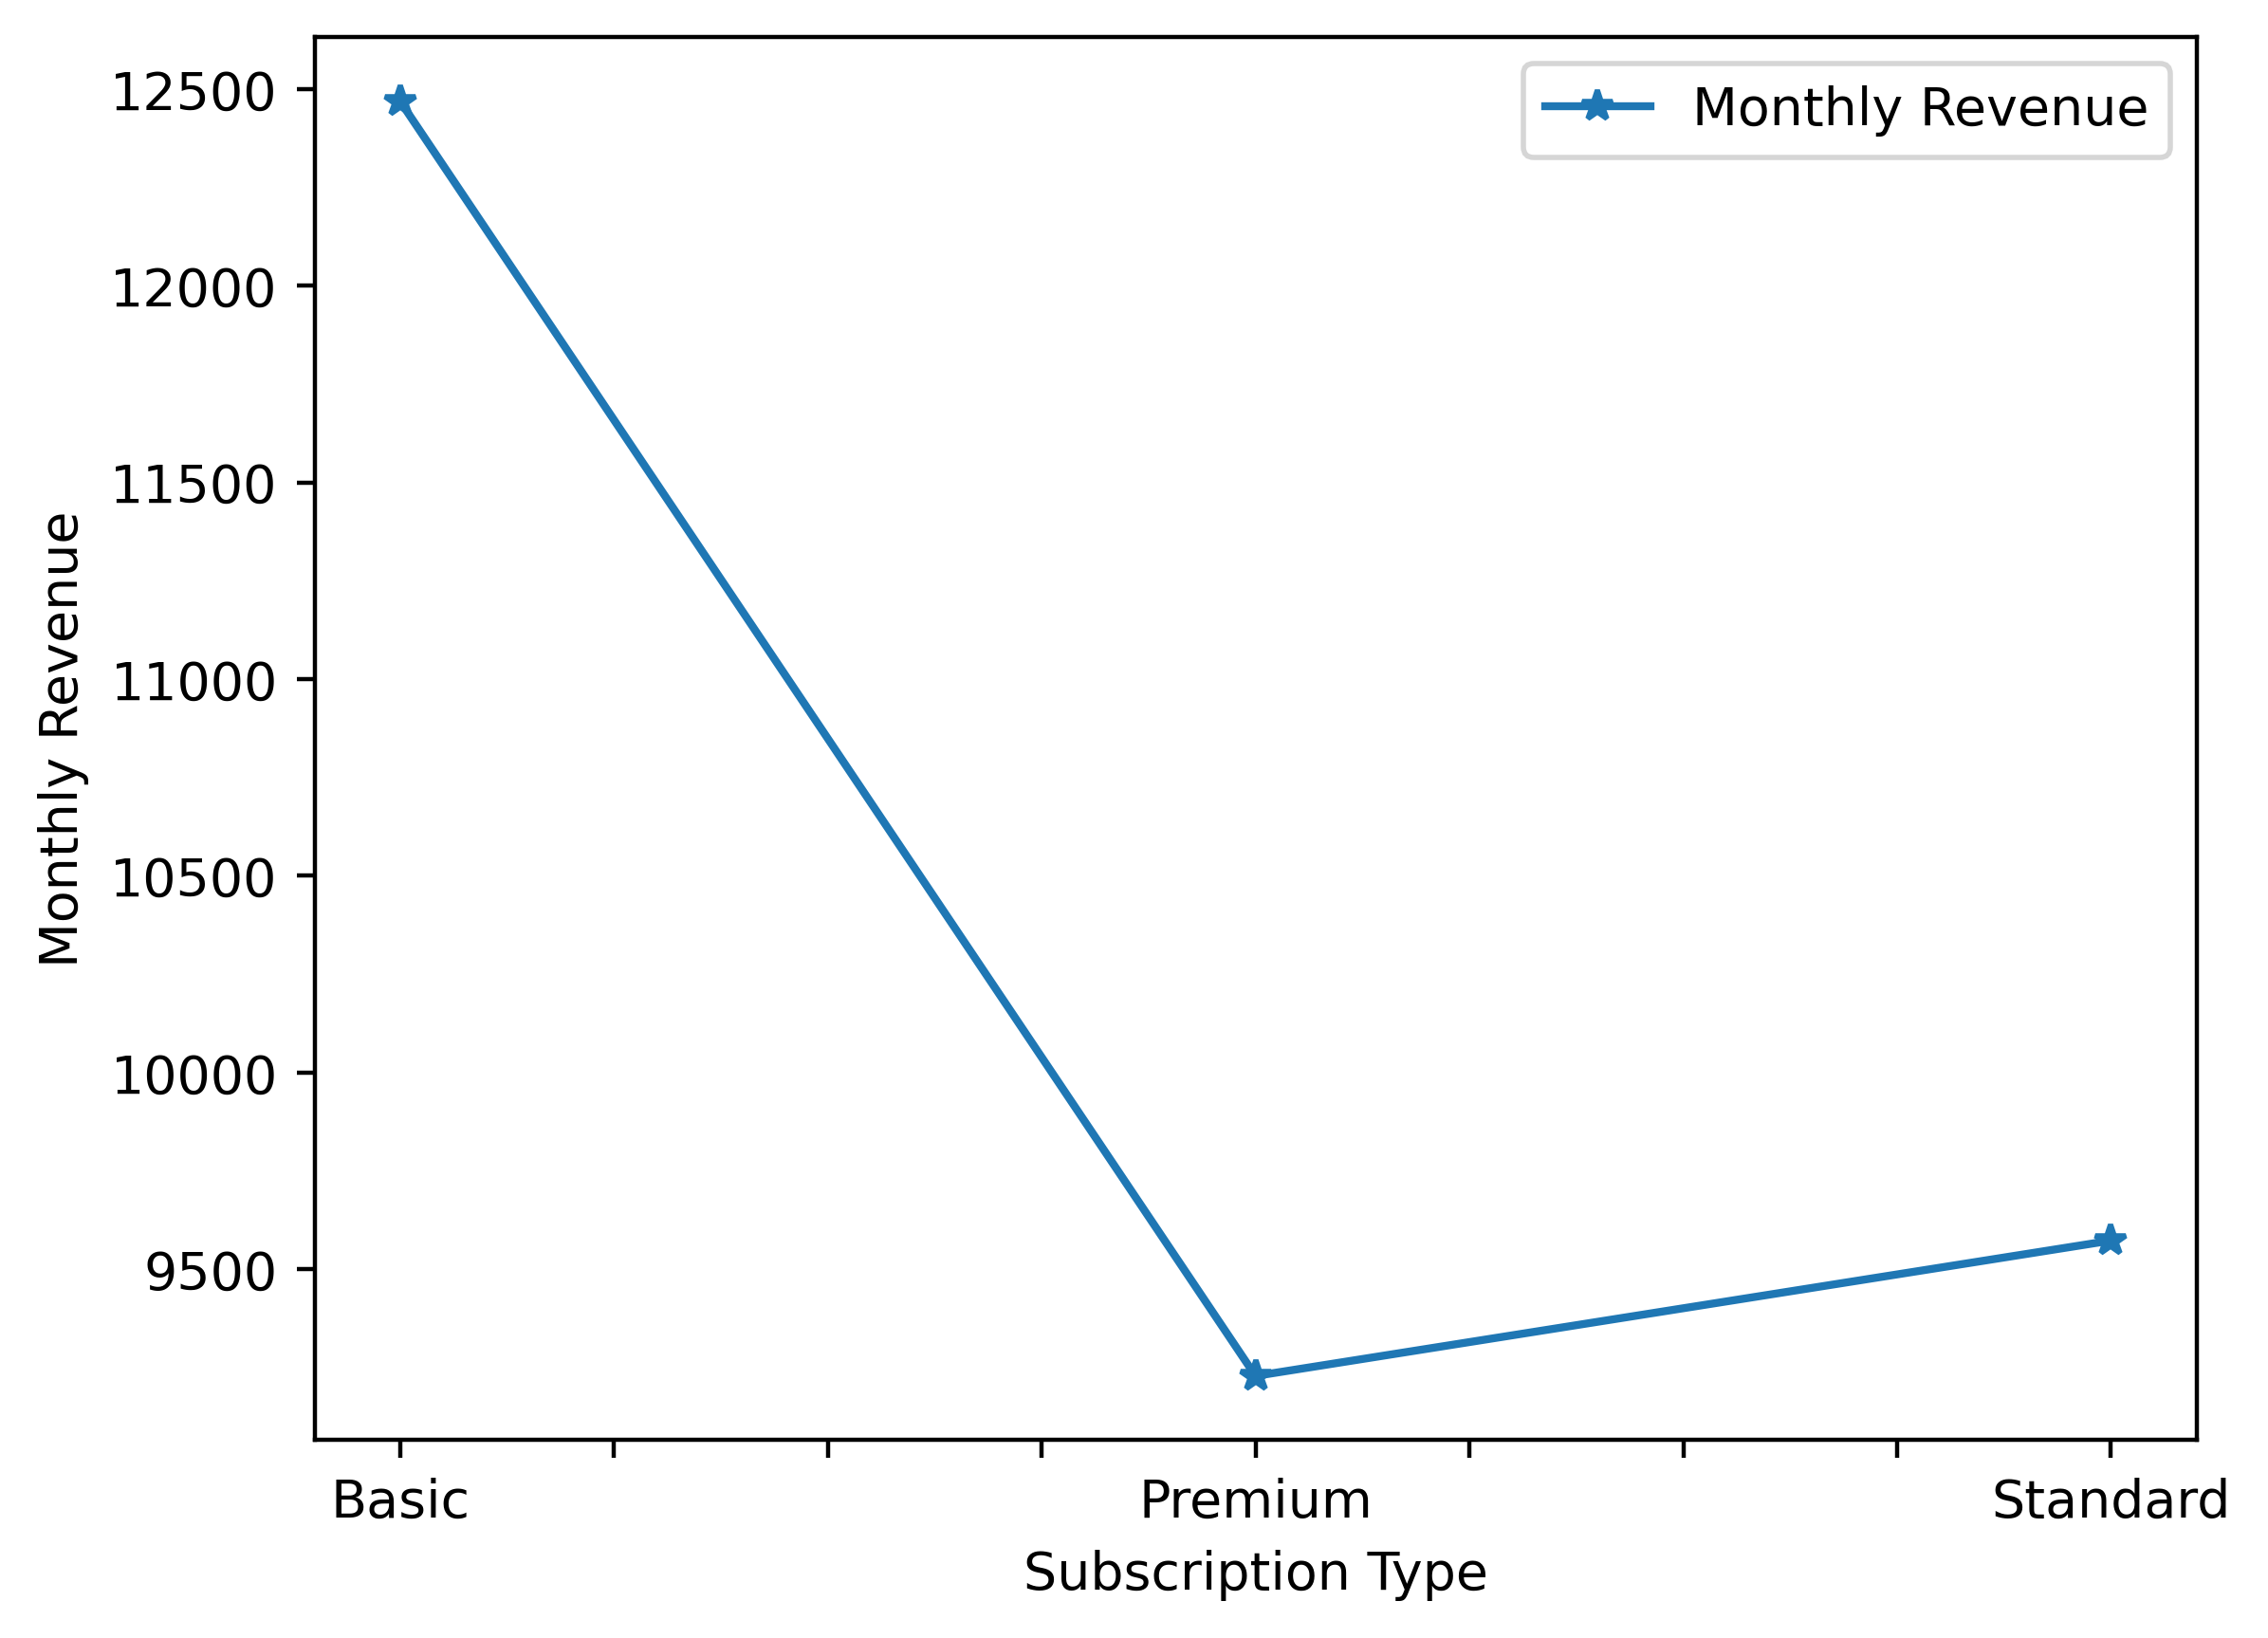

In [84]:
# Here we are find the monthly revenue based on the type of subscription 
df.groupby('Subscription Type').agg({"Monthly Revenue" : "sum"}).plot.line(rot=0, marker = "*")
plt.ylabel("Monthly Revenue")
plt.show()

In [40]:
df["Join"] = pd.to_datetime(df["Join Date"],format='%d-%m-%y')
df["Last_pay"] = pd.to_datetime(df["Last Payment Date"],format='%d-%m-%y')

In [41]:
df["days_last"] =  df["Last_pay"] - df["Join"]

In [42]:
df["days_last"].describe()
df["days_last"] = df["days_last"].dt.days

Boxplot to represent no of days each subscription memeber last for 

<class 'pandas.core.series.Series'>
RangeIndex: 2500 entries, 0 to 2499
Series name: days_last
Non-Null Count  Dtype
--------------  -----
2500 non-null   int64
dtypes: int64(1)
memory usage: 19.7 KB


<Axes: title={'center': 'days_last'}, xlabel='Subscription Type'>

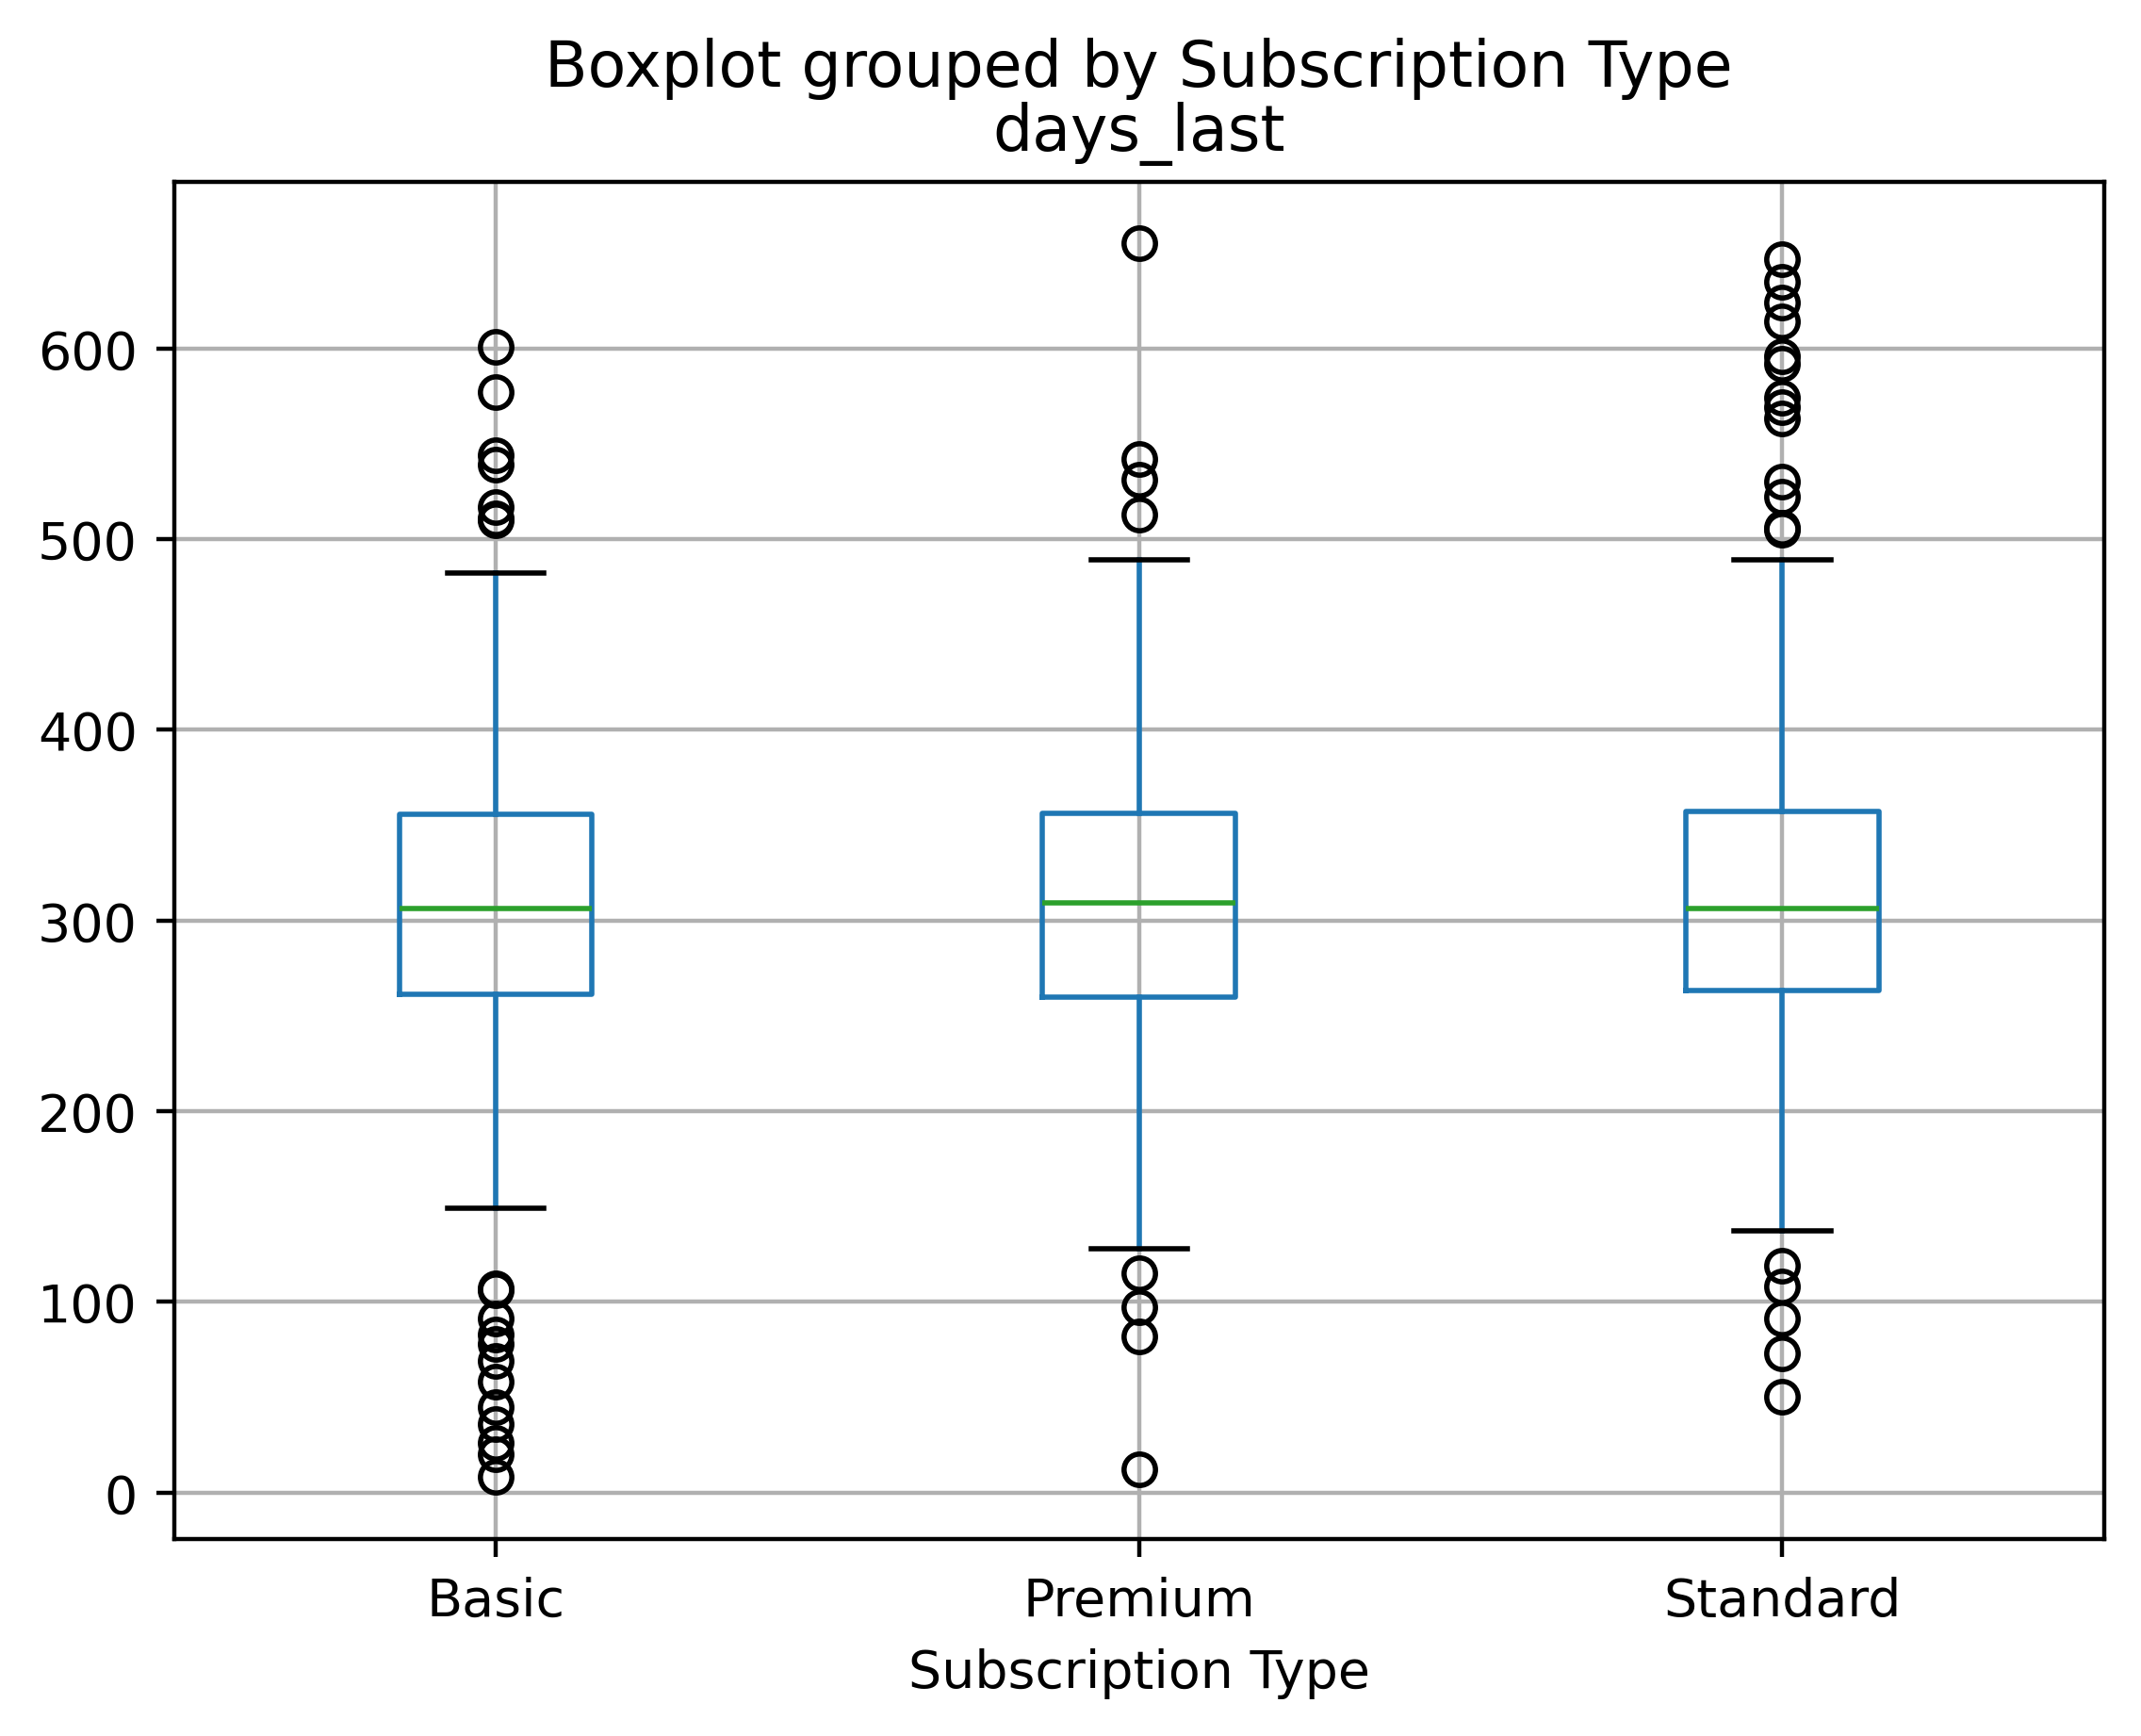

In [43]:
df["days_last"].info()
df.boxplot(column='days_last', by='Subscription Type', vert=True)

Fetching the top 5 High spending subscribers 

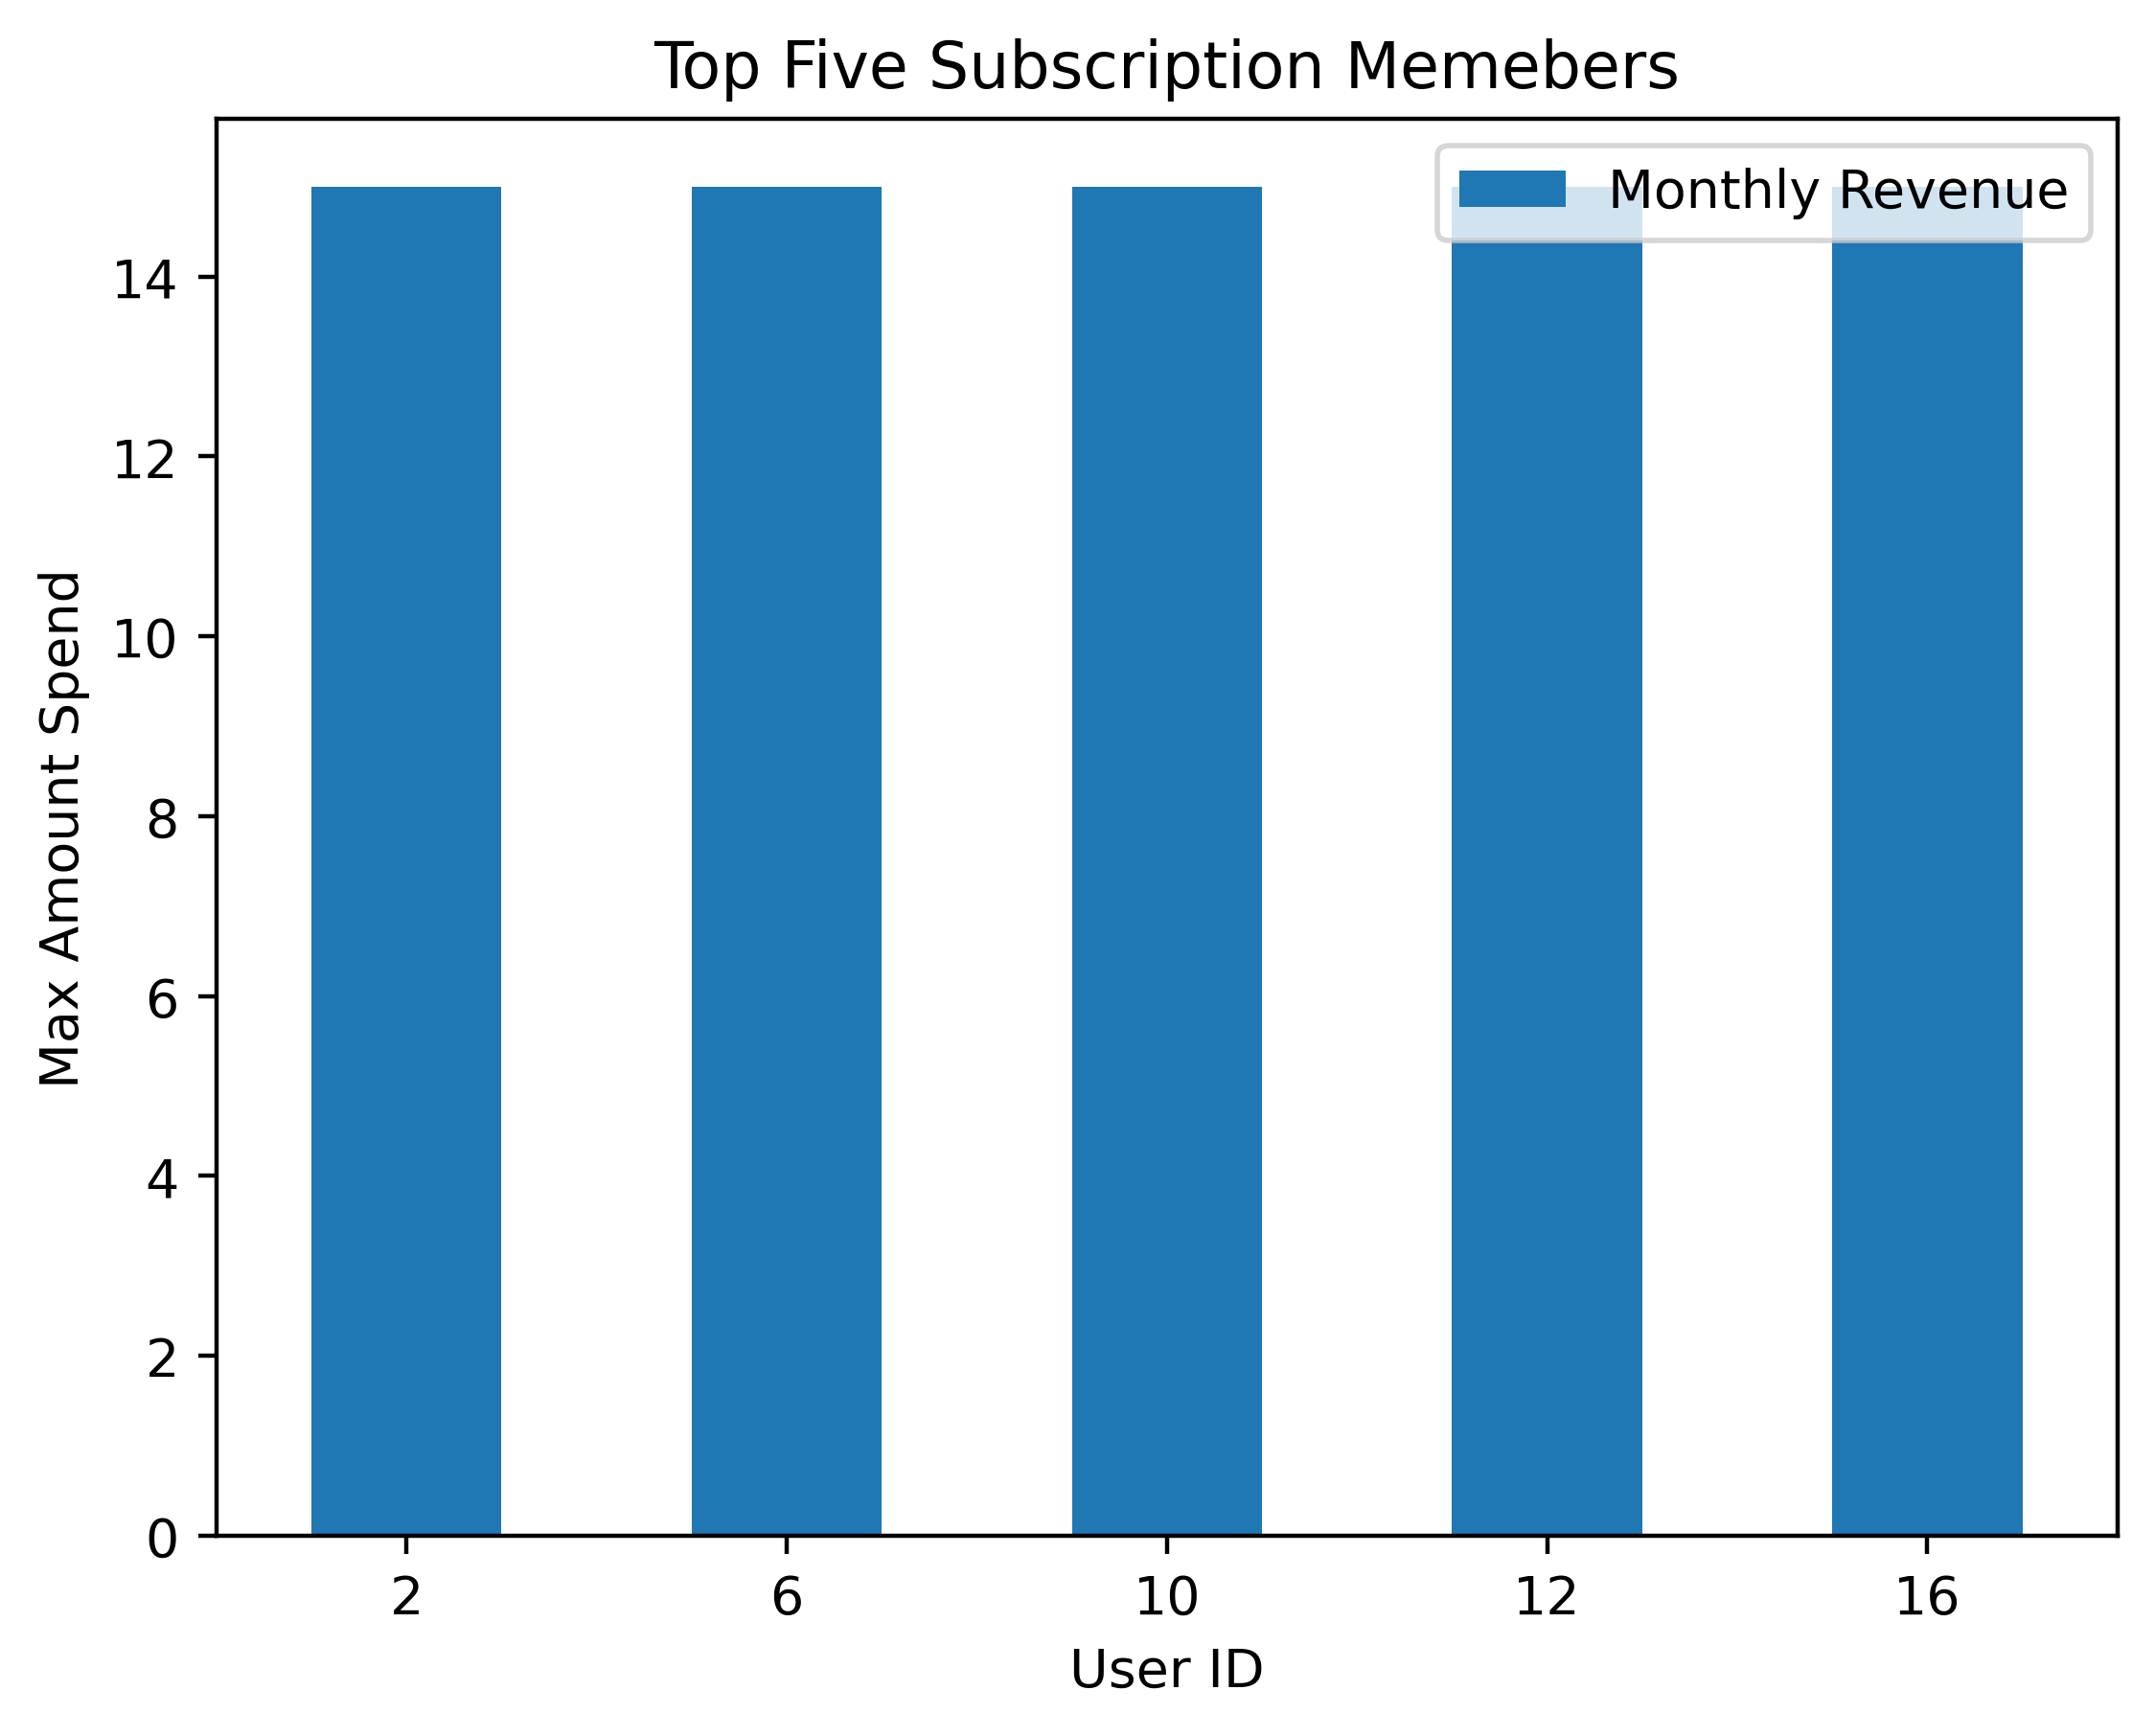

In [44]:
maxs = df.nlargest(5,"Monthly Revenue")
maxs.plot(kind="bar" , x = "User ID" , y = "Monthly Revenue", rot =0)
plt.title("Top Five Subscription Memebers")
plt.ylabel("Max Amount Spend")
plt.show()

Revenue based on the Gender

Text(0, 0.5, 'Total Sum of Pays')

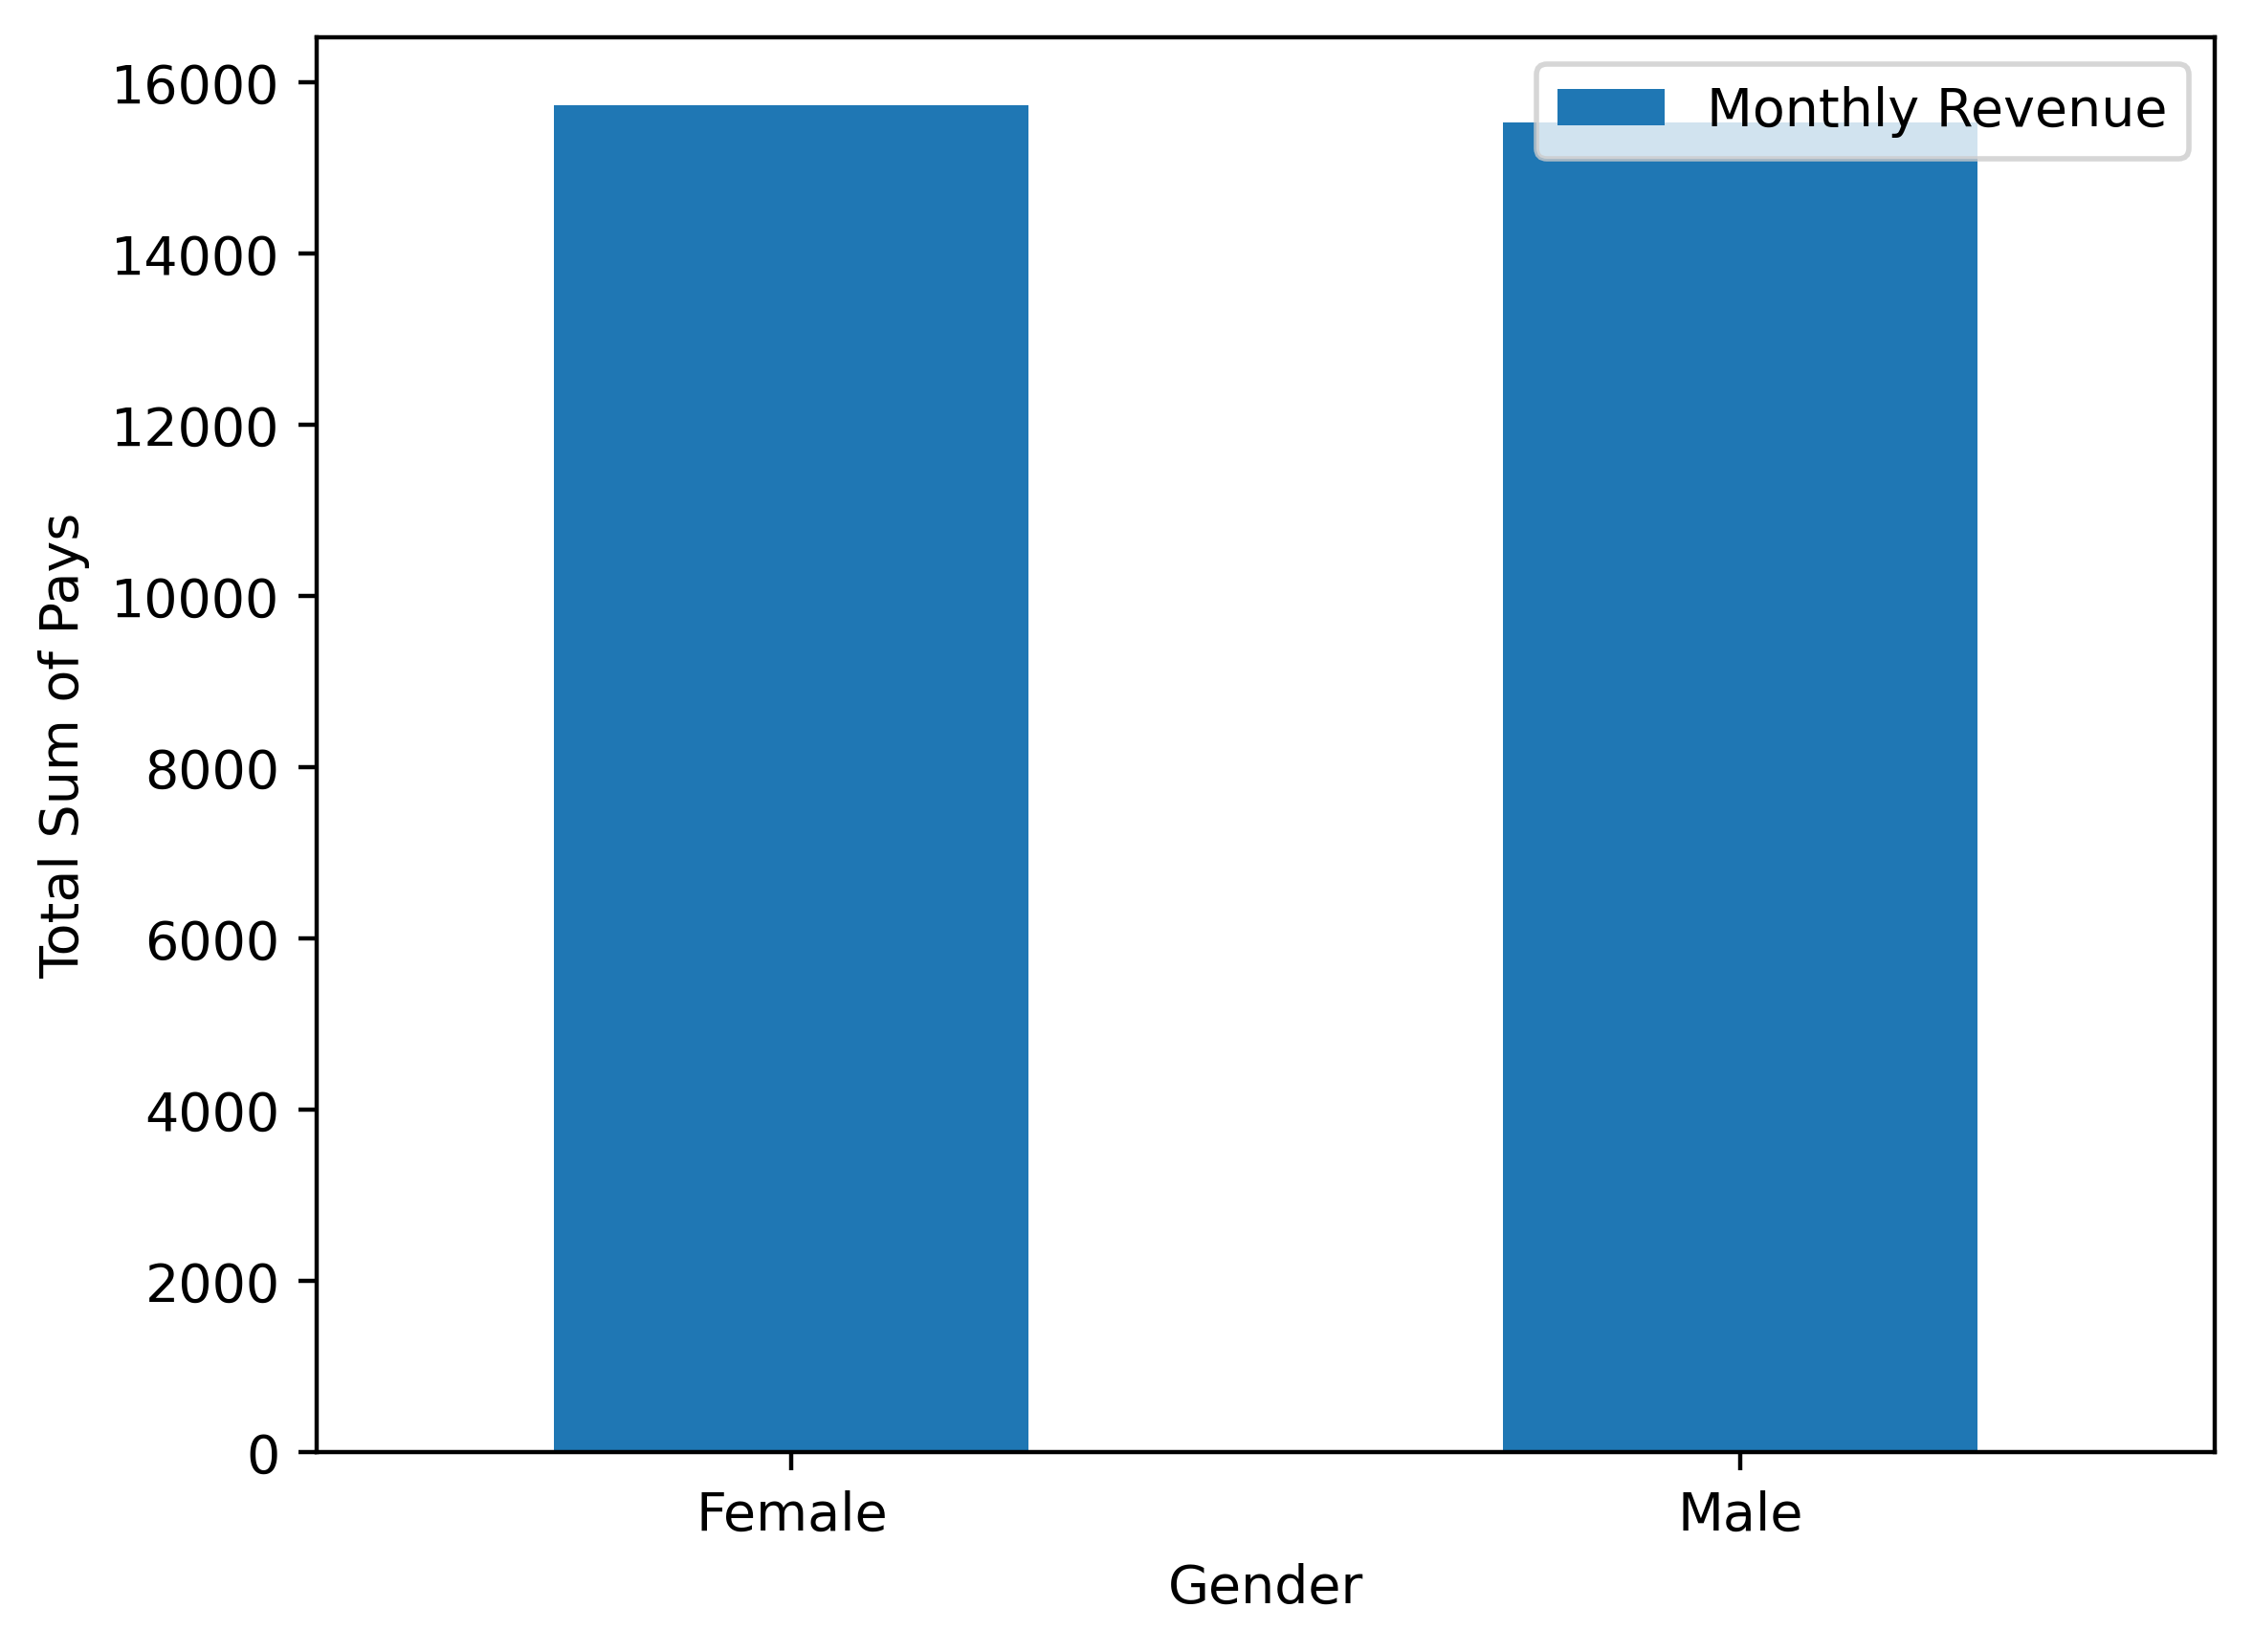

In [45]:
df.groupby("Gender").agg({"Monthly Revenue" : "sum"}).plot.bar(rot = 0 )
plt.ylabel("Total Sum of Pays")

No of users based on the country

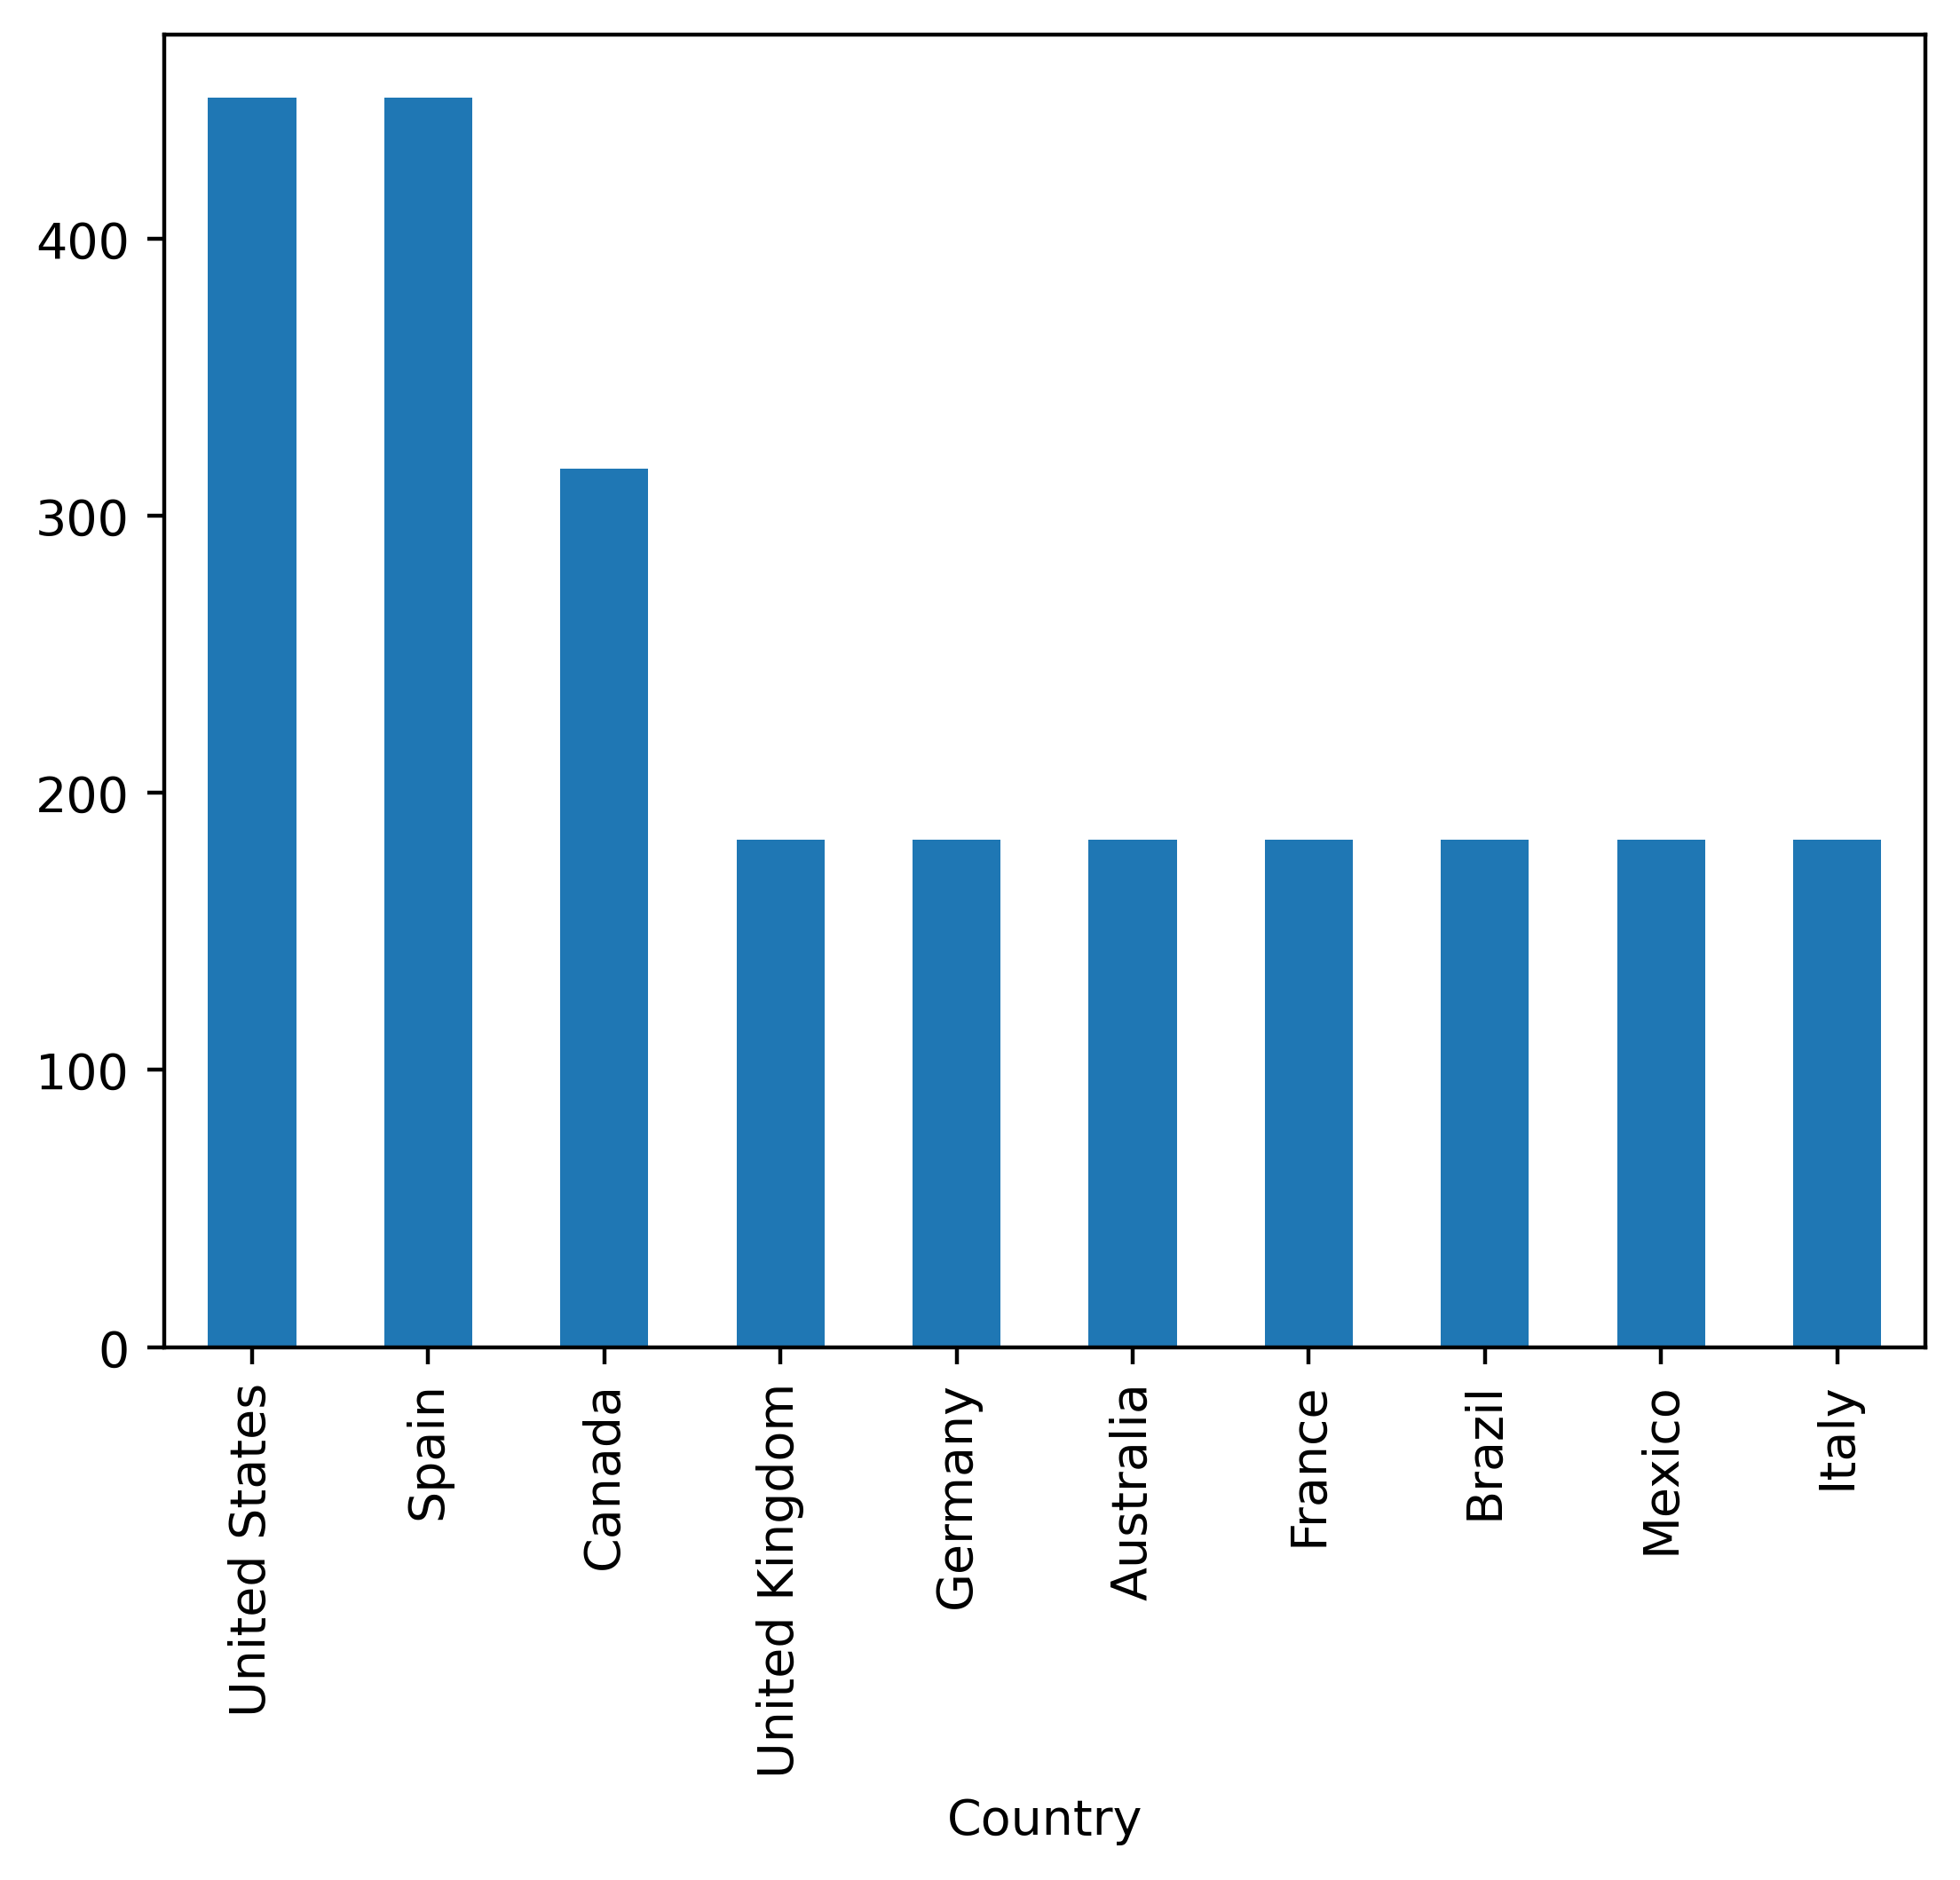

In [58]:
country_count= df["Country"].value_counts()
country_count.plot(kind = "bar" )
plt.show()

Scatter plot to show relationship between the age_category and Monthly revenue

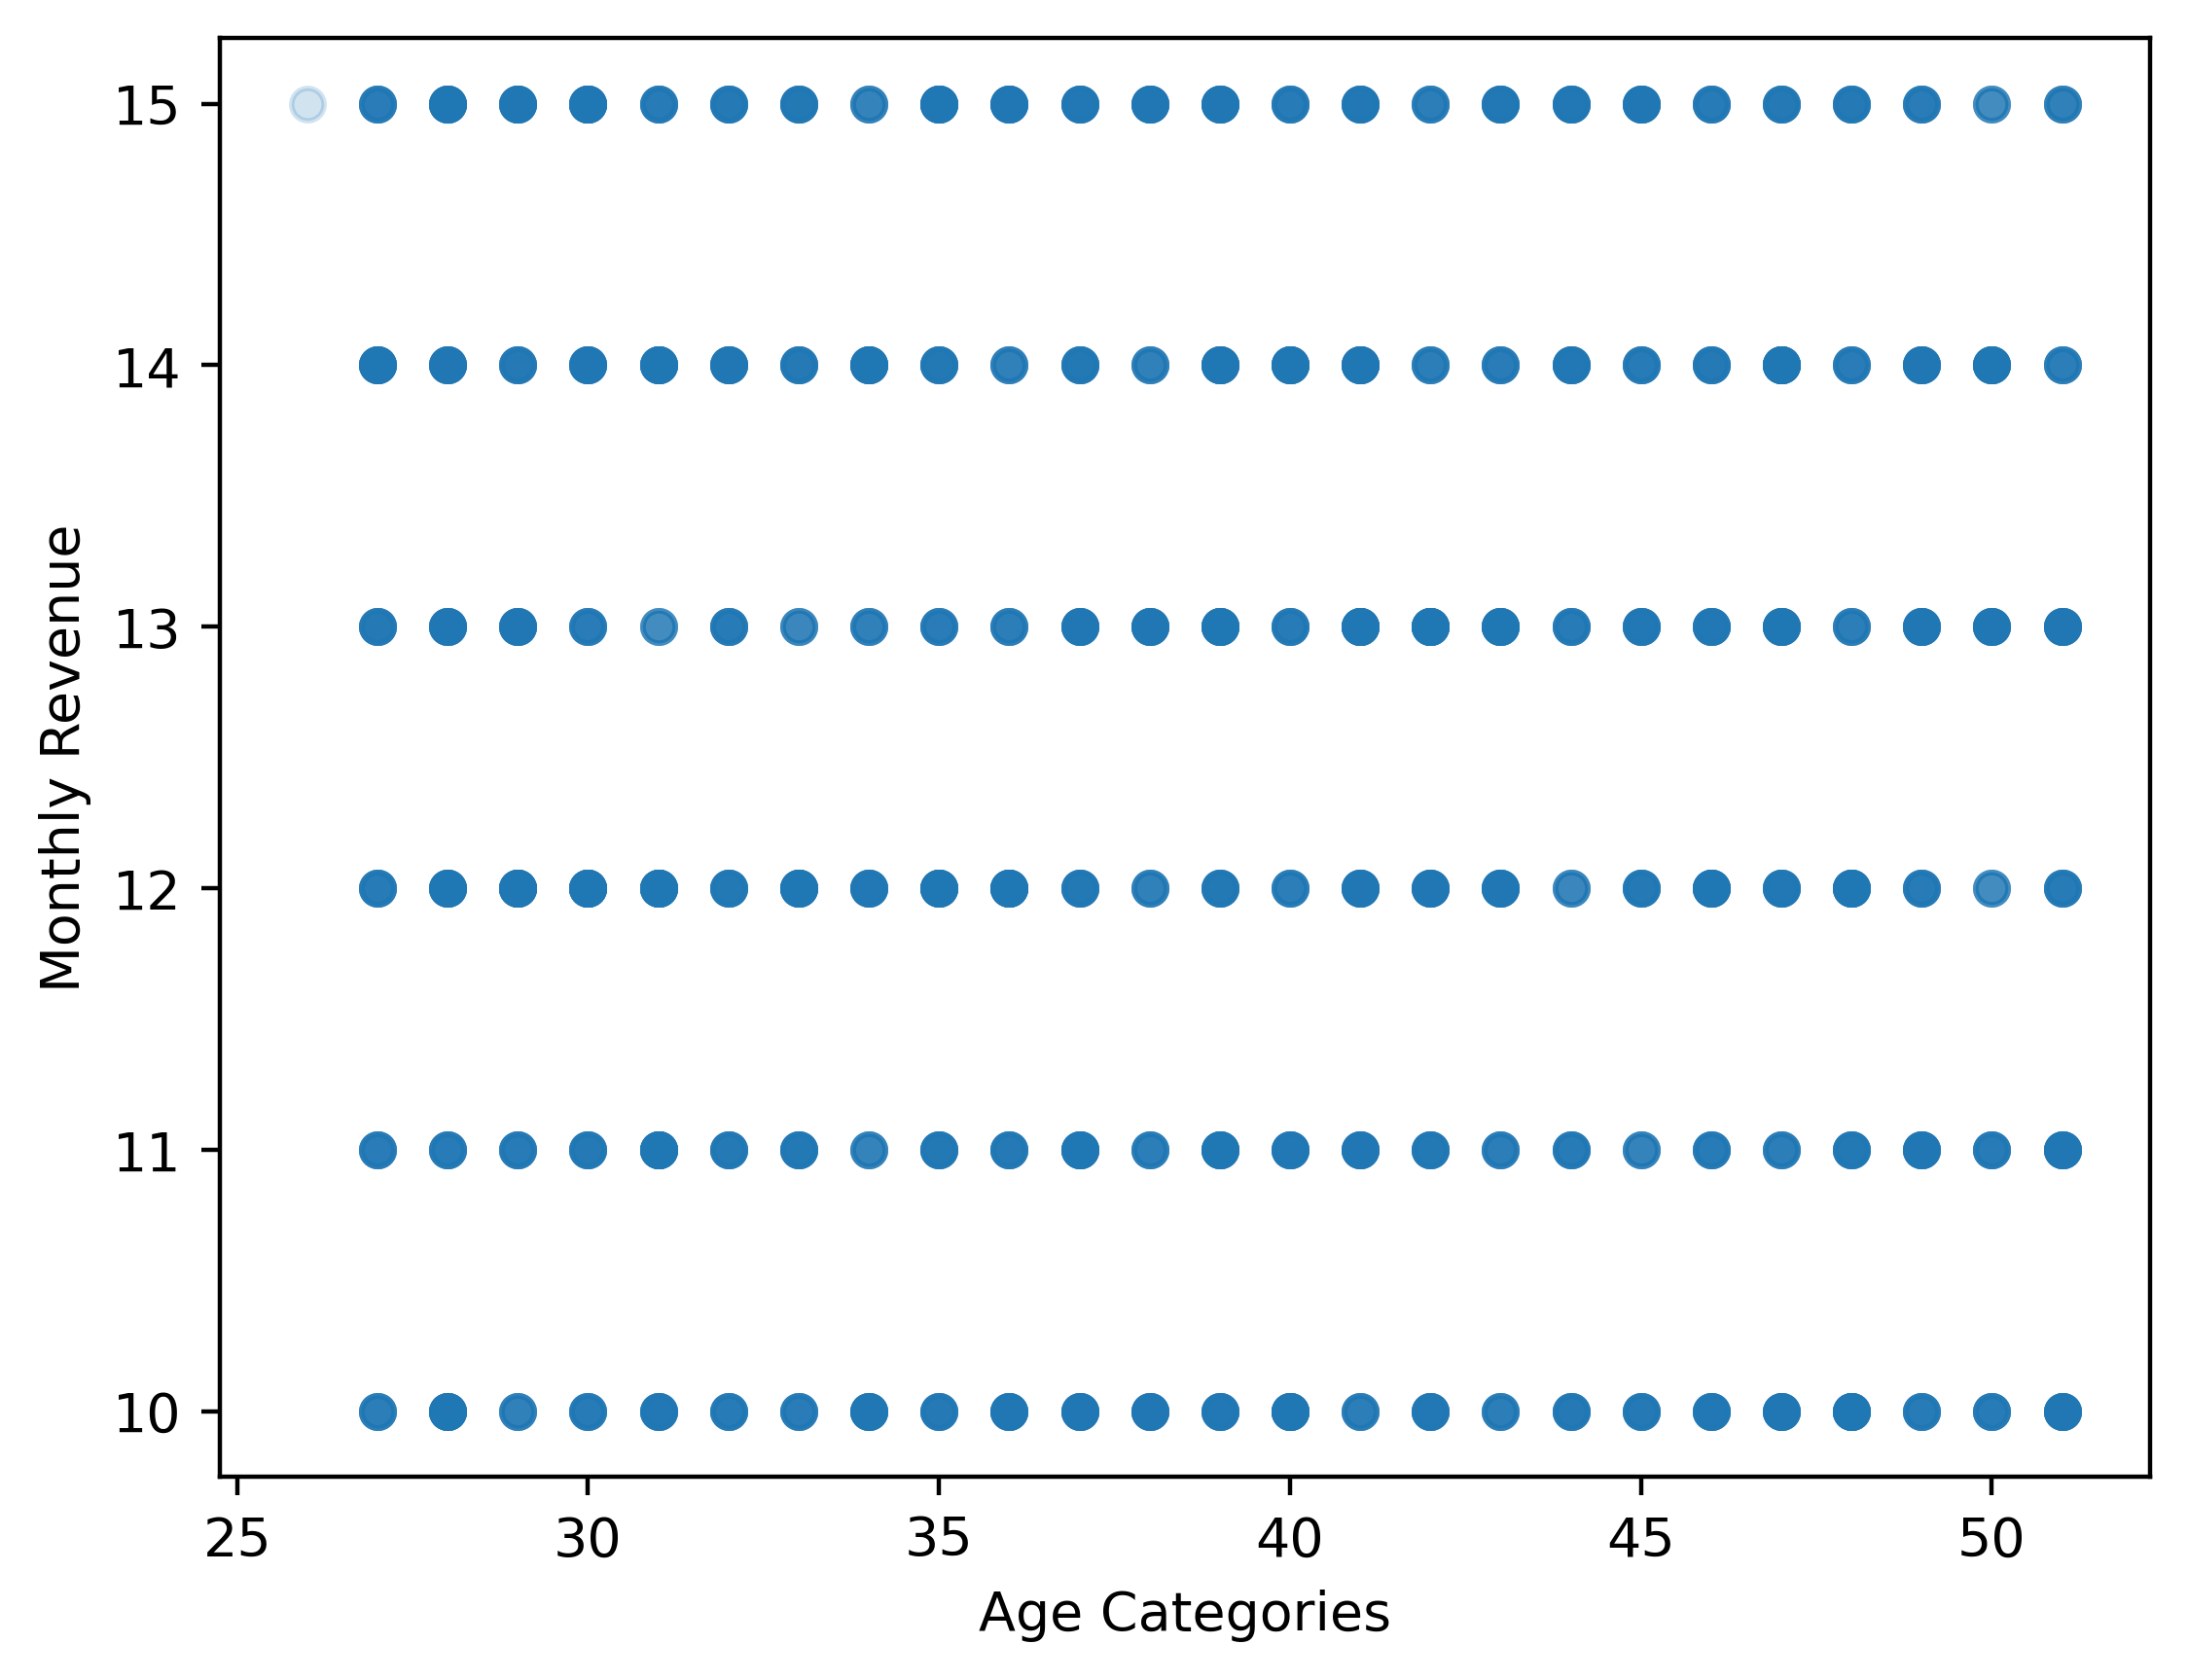

In [128]:
age_cat = df["Age"].value_counts()
plt.scatter(df["Age"],df["Monthly Revenue"], alpha=0.2)
plt.xlabel("Age Categories")
plt.ylabel("Monthly Revenue")
plt.show()

Revenue Based on the Type of screen 

Text(0.5, 1.0, 'Revenue Based on Screen')

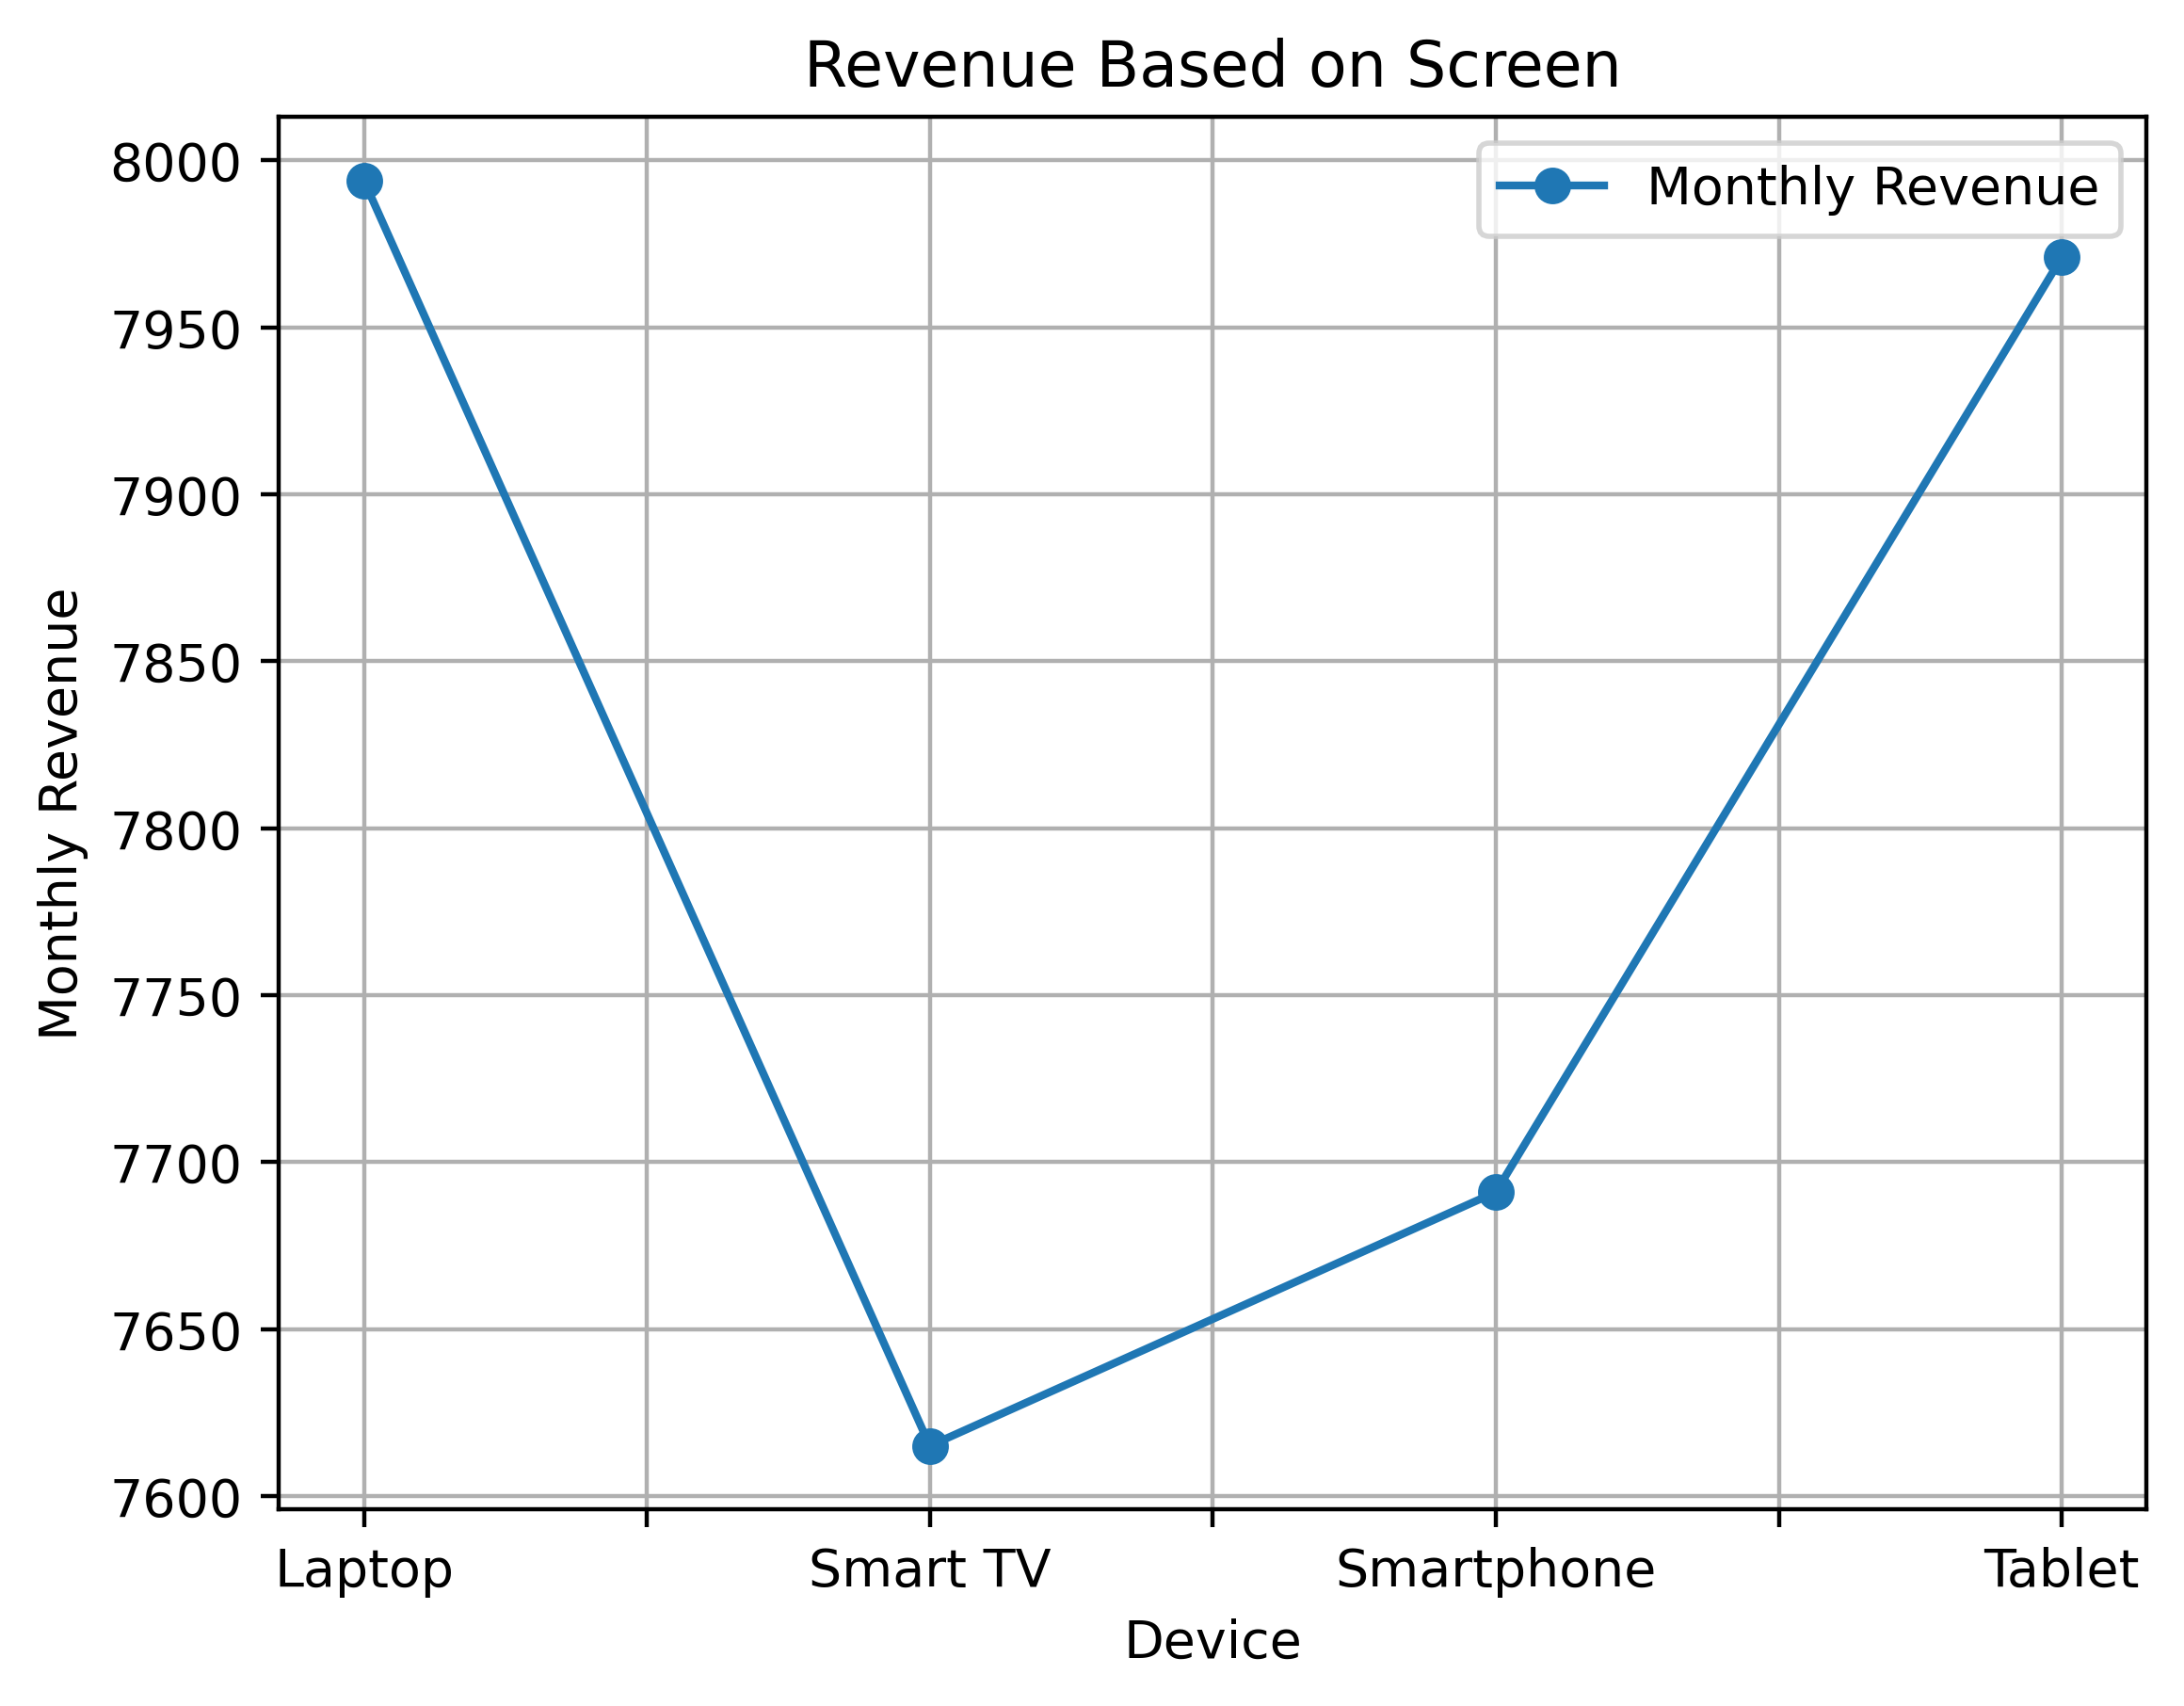

In [83]:
new_cat = df.groupby("Device").agg({"Monthly Revenue" : "sum"}).plot.line(rot = 0,grid = True, marker ="o")
plt.ylabel("Monthly Revenue")
plt.title("Revenue Based on Screen")

Churn Disk detections

In [130]:
df["Last Payment Date"] = pd.to_datetime(df["Last Payment Date"],format='%d-%m-%y')
last_payment = df["Last Payment Date"].max()
last_payment

Timestamp('2023-07-15 00:00:00')

In [131]:
df["Left_Days"] = (last_payment - df["Last Payment Date"]).dt.days

In [132]:
# Since we have only one id in 30 > cat i have selected 15 days instead 
df["chrun_id"] = df["Left_Days"]>15
df["chrun_id"].value_counts()

chrun_id
False    1767
True      733
Name: count, dtype: int64

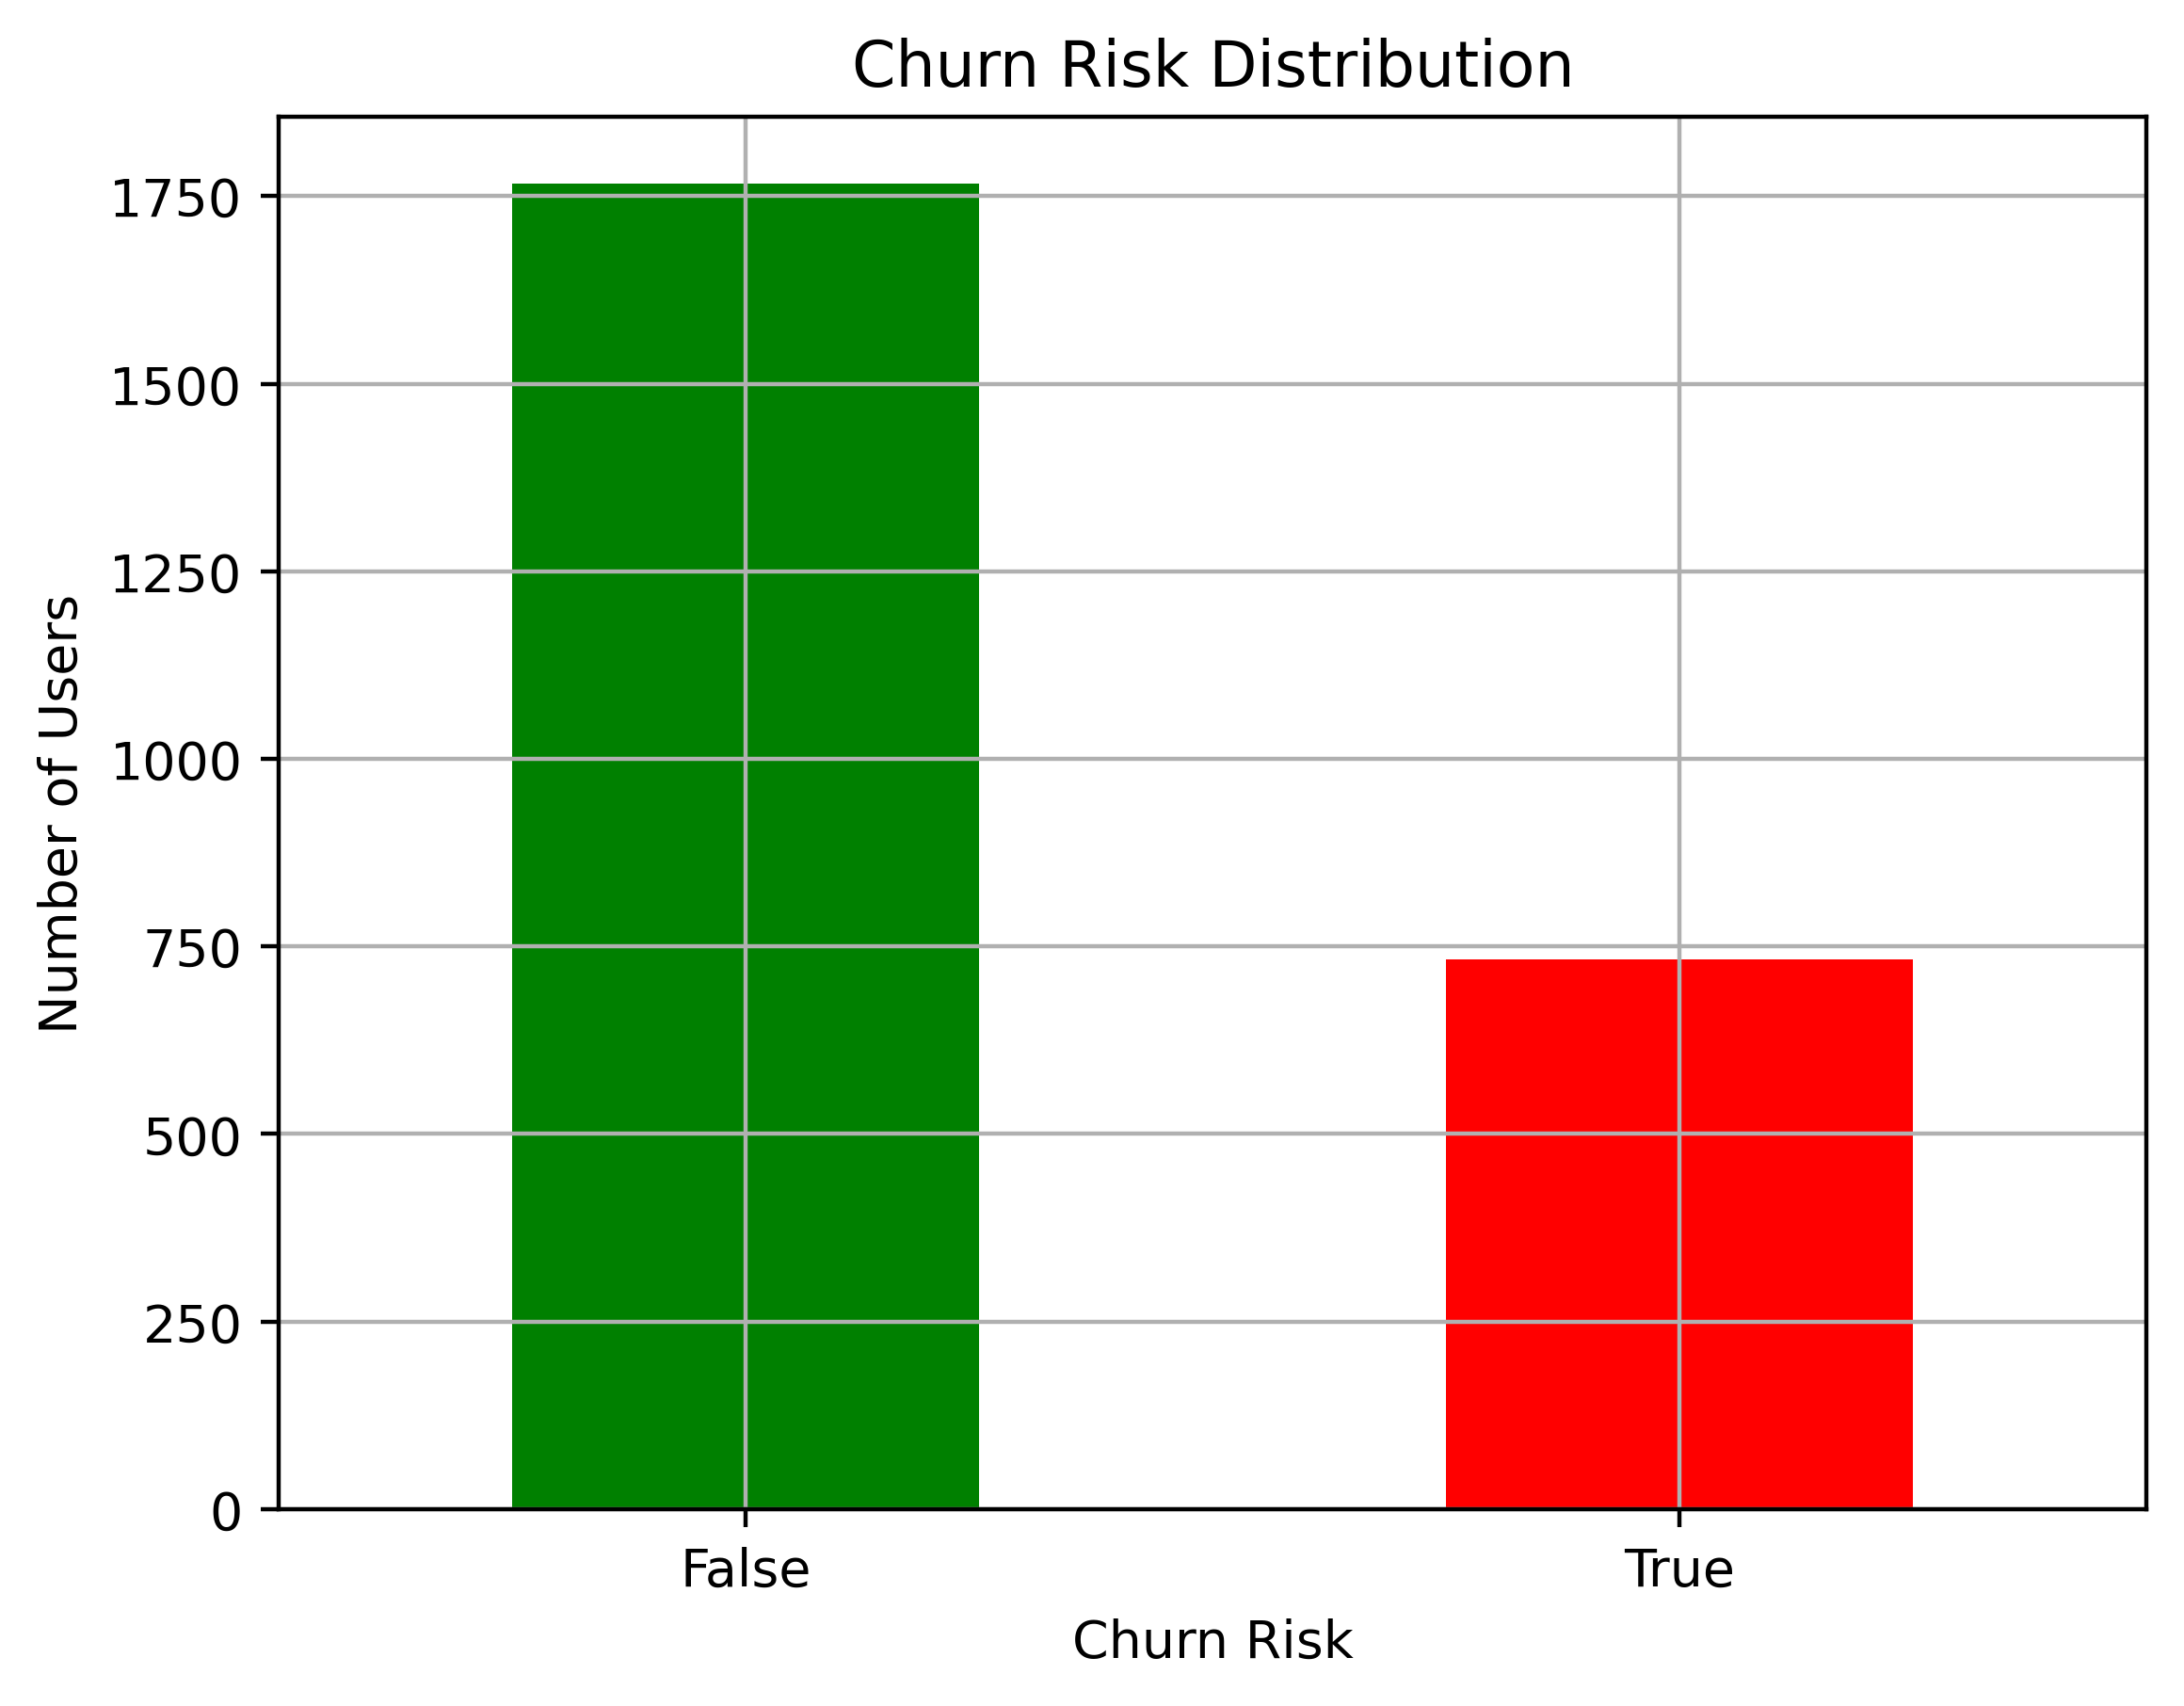

In [127]:
churn_counts = df['chrun_id'].value_counts()
churn_counts.plot(kind='bar', color=['green', 'red'],rot=0,grid = True)
plt.title('Churn Risk Distribution')
plt.xlabel('Churn Risk')
plt.ylabel('Number of Users')
plt.show()

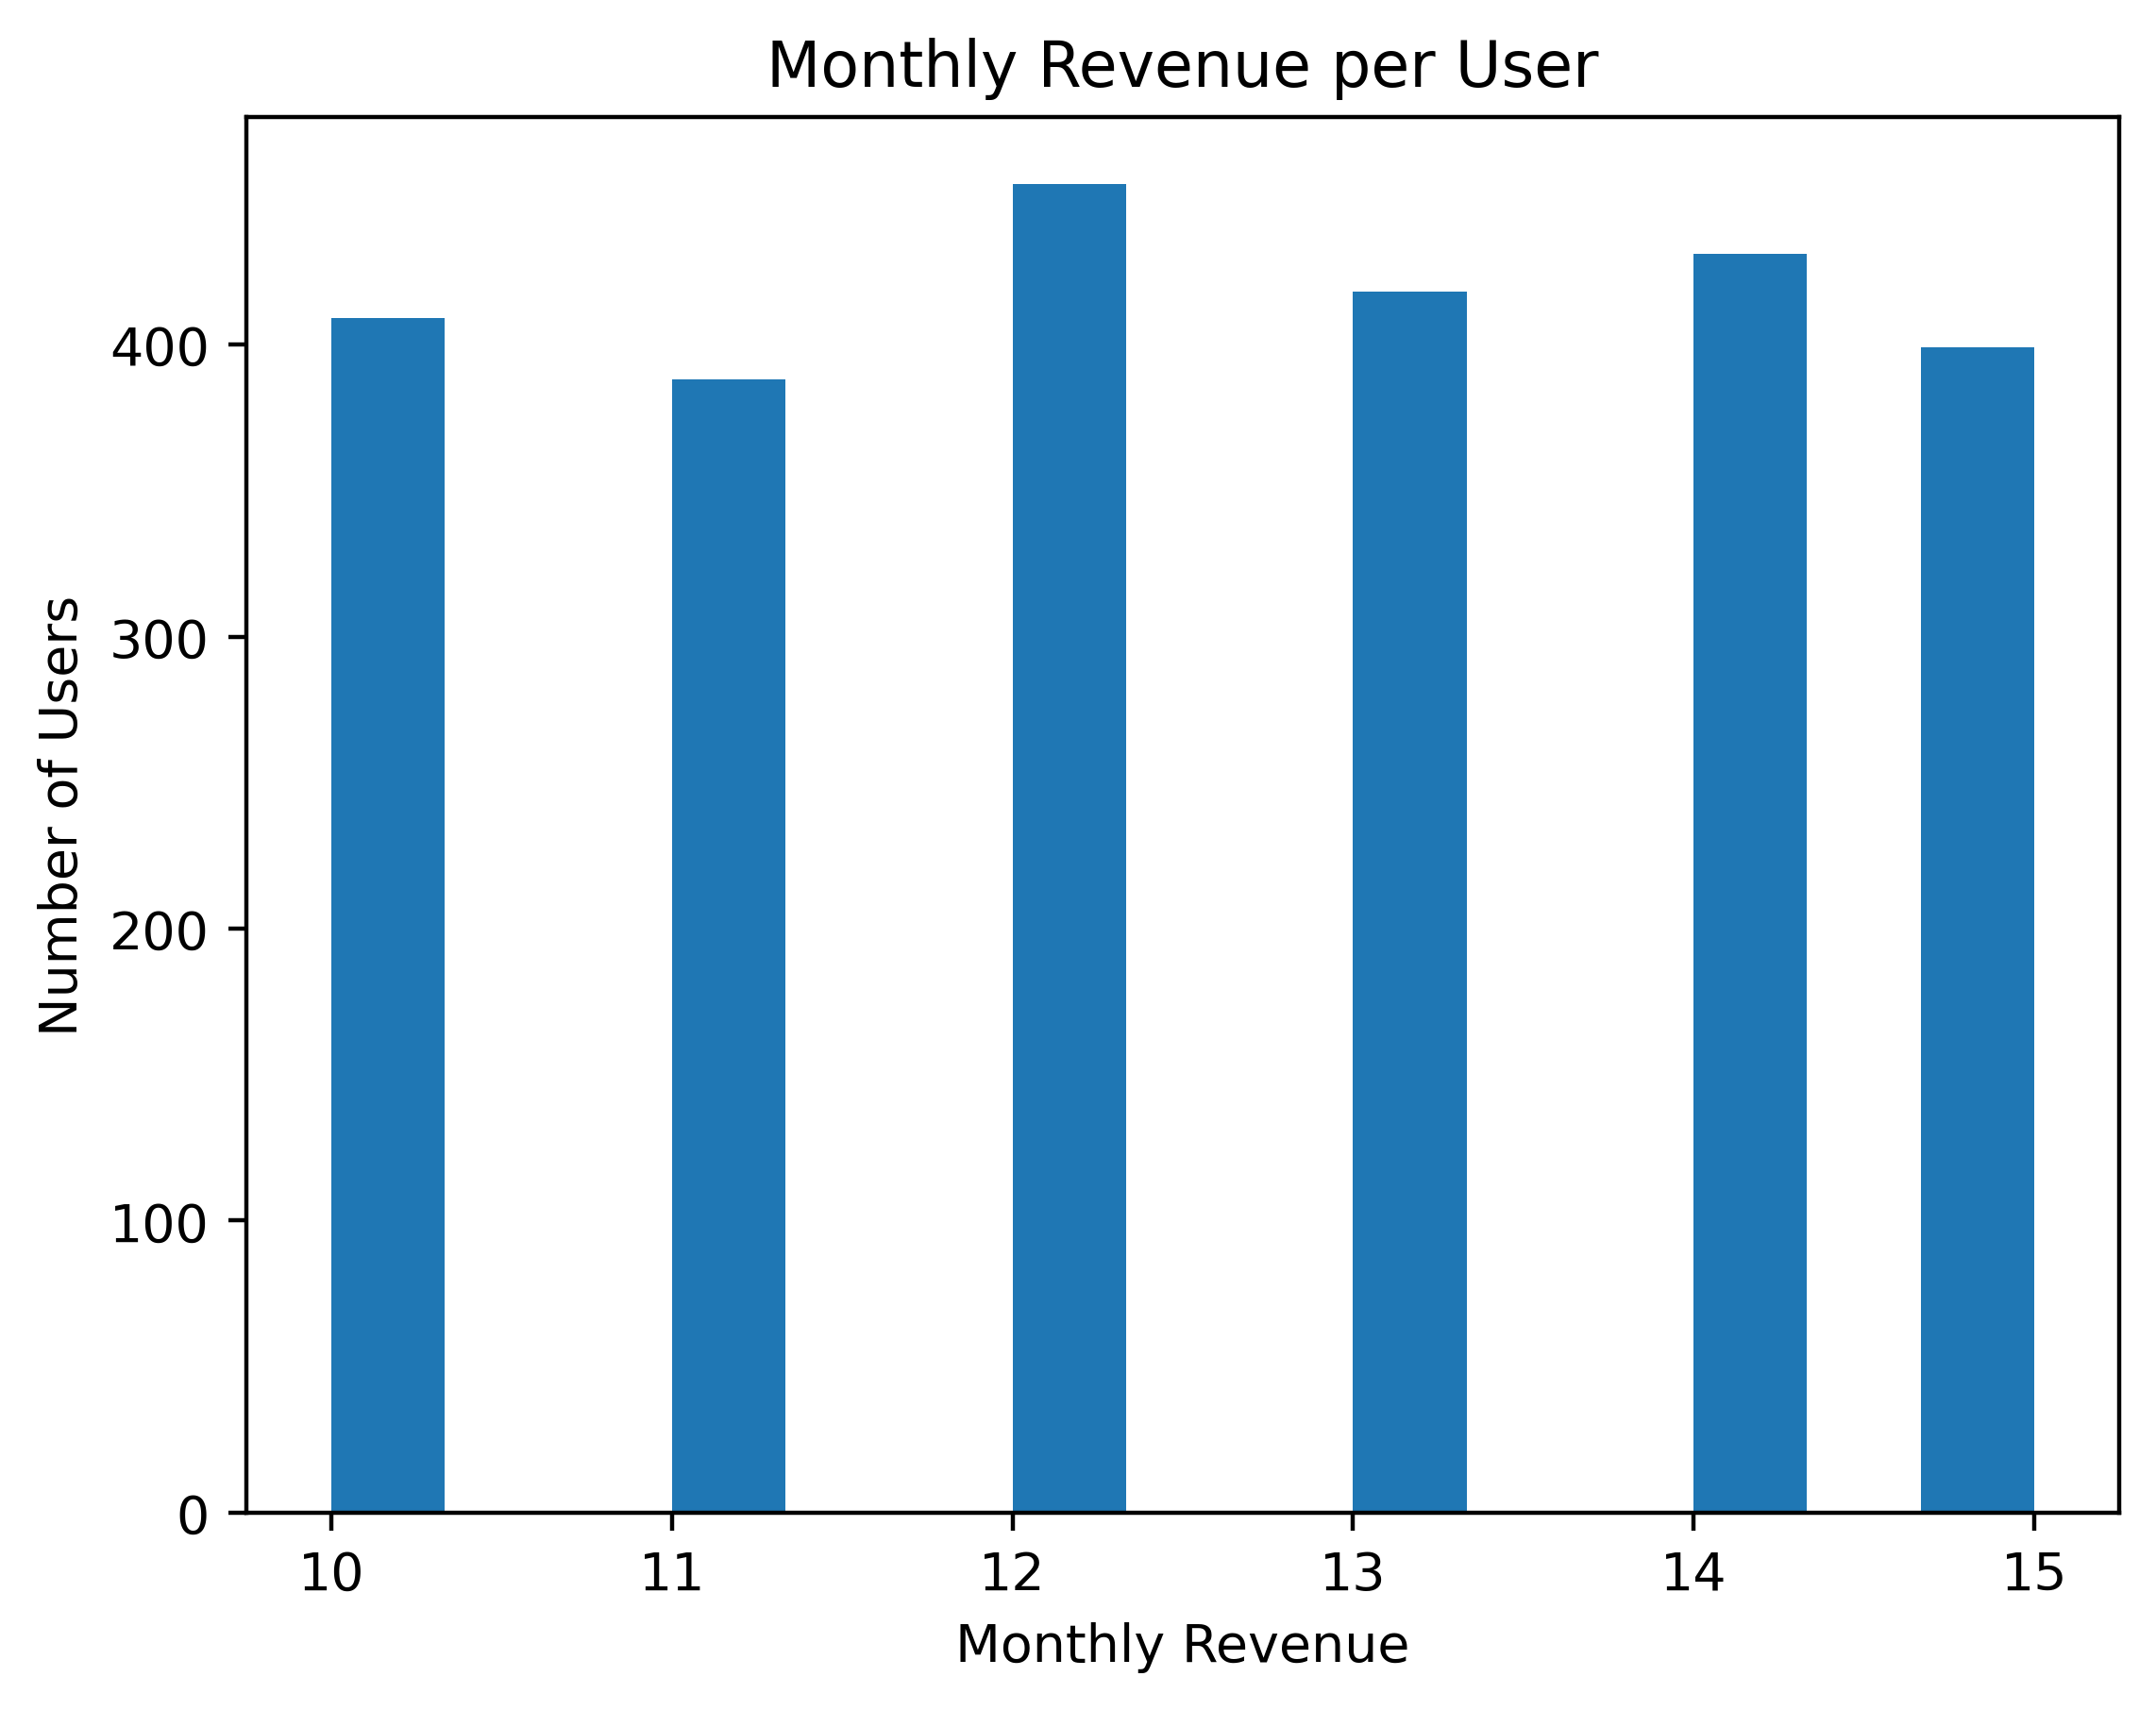

In [129]:
df["Monthly Revenue"].plot(kind ="hist", bins = 15 )
plt.title('Monthly Revenue per User')
plt.xlabel('Monthly Revenue')
plt.ylabel('Number of Users')
plt.show()